## Explorační analýza dat o veřejných zakázkách

In [1]:
import numpy as np
from webpages.preprocessing import Preprocessor

Načtení dat:

In [2]:
p = Preprocessor('C:\\Users\marti\PycharmProjects\\bakalarka\data_2')

In [3]:
dataframes = p.get_dataframes()

In [4]:
def basic_stats(df):
    print(f"Počet řádek je {df.shape[0]} a počet sloupců je {df.shape[1]}")
    print(f"Statitiky pro číselné příznaky:")
    display(df.describe())
    print(f"Chybějící hodnoty v %:")
    display(df.isna().sum() / df.shape[0] * 100)
    print(f"Příklad záznamů z tabulky:")
    display(df.head(10))

#### Informace o tabulce address:

land_registry_number - Číslo popisné 
building_number - Číslo orientační

In [5]:
basic_stats(dataframes['address'])

Počet řádek je 10448 a počet sloupců je 9
Statitiky pro číselné příznaky:


,id,land_registry_number,latitude,longitude
count,10448.000000,9887.000000,5589.000000,5589.000000
mean,5278.642420,876.601295,49.827102,15.504617
std,3035.835012,1609.095186,0.912188,2.718896
min,1.000000,0.000000,18.418805,-64.597298
25%,2632.750000,168.000000,49.575837,14.424908
50%,5295.500000,544.000000,50.038850,14.503491
75%,7907.250000,1190.000000,50.088160,16.632880
max,10519.000000,78701.000000,60.182430,116.489593


Chybějící hodnoty v %:


id                       0.000000
building_number         45.788668
city                     0.076570
country_code            39.203675
land_registry_number     5.369449
latitude                46.506508
longitude               46.506508
postal_code              2.488515
street                  15.218224
dtype: float64

Příklad záznamů z tabulky:


,id,building_number,city,country_code,land_registry_number,latitude,longitude,postal_code,street
0,1,NaN,Praha,NaN,682.0,NaN,NaN,19016,Zalešanská
1,2,1,Praha,CZ,221.0,50.095041,14.403276,16000,Tychonova
2,3,NaN,České Budějovice,NaN,NaN,NaN,NaN,37005,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,91,Jablonec nad Nisou,CZ,4588.0,50.731404,15.174121,46601,Smetanova
5,6,NaN,Tetín,NaN,1.0,NaN,NaN,26601,náměstí Kněžny Ludmily
6,7,NaN,Pardubice,NaN,107.0,NaN,NaN,53002,NaN
7,8,NaN,Helvíkovice,NaN,90.0,NaN,NaN,56401,NaN
8,9,58,Praha,CZ,1552.0,50.049737,14.458768,14100,Michelská
9,10,NaN,"Klatovy, 339 01",NaN,NaN,NaN,NaN,NaN,Ostravská 169


#### Informace o tabulce company

vat_id_number - DIČ
organisation_id - IČO

In [6]:
basic_stats(dataframes['company'])

Počet řádek je 12311 a počet sloupců je 5
Statitiky pro číselné příznaky:


,id,address_id
count,12311.000000,12311.000000
mean,6181.052148,4475.818049
std,3555.202724,3214.241409
min,1.000000,1.000000
25%,3101.500000,1575.500000
50%,6182.000000,4175.000000
75%,9259.500000,7229.500000
max,12337.000000,10519.000000


Chybějící hodnoty v %:


id                  0.000000
vat_id_number      50.483308
company_name        0.000000
organisation_id     3.890829
address_id          0.000000
dtype: float64

Příklad záznamů z tabulky:


,id,vat_id_number,company_name,organisation_id,address_id
0,1,CZ7303070038,Dušan Pirc,66442460,1
1,2,CZ26031868,CB Auto a.s.,26031868,3
2,3,NaN,Pes profesionál s. r. o.,03566358,4
3,4,CZ62738542,Severočeské komunální služby s.r.o.,62738542,5
4,5,CZ47538856,JOHNNY SERVIS s.r.o.,47538856,6
5,6,NaN,Explosia a.s.,25291581,7
6,7,CZ25286366,Dibaq a.s.,25286366,8
7,8,NaN,Royal Canin Czech & Slovak Republics s.r.o.,24663913,9
8,9,NaN,RC-eltech s.r.o.,06909981,10
9,10,NaN,Lada Tittlová,NaN,4


vat_id_number - DIČ
organisation_id - IČO

Počet duplicitních DIČ v tabulce company:

In [7]:
dataframes['company']['vat_id_number'].value_counts()

vat_id_number
CZ              8
CZ699003219     4
CZ25568752      3
CZ25056646      3
CZ699001005     3
               ..
CZ09967273      1
CZ27314588      1
CZ28100603      1
CZ5607160922    1
CZ26025272      1
Name: count, Length: 6010, dtype: int64

Název firem s duplicitním DIČ: CZ699003219

In [8]:
dataframes['company'][dataframes['company']['vat_id_number'] == 'CZ699003219']

,id,vat_id_number,company_name,organisation_id,address_id
85,109,CZ699003219,EXCALIBUR ARMY spol. s r.o.,64573877,119
1084,1107,CZ699003219,LIKVIDACE ODPADU CZ s.r.o.,24823473,1199
2000,1943,CZ699003219,TATRA DEFENCE VEHICLE a.s.,24152269,119
8268,8252,CZ699003219,LIKVIDACE ODPADU CZ a.s.,24823473,1199


Počet duplicitních IČO v tabulce company:

In [9]:
dataframes['company']['organisation_id'].value_counts()

organisation_id
02483360    5
10645969    4
02225506    4
00351504    3
26432668    3
           ..
65724976    1
19319762    1
46345949    1
25291408    1
26025272    1
Name: count, Length: 11572, dtype: int64

Název firem s duplicitním IČO: 02483360

In [10]:
dataframes['company'][dataframes['company']['organisation_id'] == '02483360']

,id,vat_id_number,company_name,organisation_id,address_id
2318,2260,NaN,CLICKPORT s. r. o.,02483360,2335
6418,6355,NaN,CLICKPORT s.r.o.,02483360,2335
6861,6798,NaN,CLICK PORT s.r.o.,02483360,6253
7935,7919,NaN,"Clikport, s. r. o.",02483360,2335
8504,8488,NaN,Clickport s. r. o.,02483360,7659


Příklad adresy firmy s duplicitním IČO a s jiným ID:

In [11]:
display(dataframes['address'][dataframes['address']['id'] == 2335])
display(dataframes['address'][dataframes['address']['id'] == 6253])
display(dataframes['address'][dataframes['address']['id'] == 7659])

,id,building_number,city,country_code,land_registry_number,latitude,longitude,postal_code,street
2400,2335,5,Přerov,CZ,406.0,49.450775,17.44412,750 02,Velké Novosady


,id,building_number,city,country_code,land_registry_number,latitude,longitude,postal_code,street
6389,6253,5,Přerov,CZ,406.0,49.450775,17.44412,750 02,Velké novosady


,id,building_number,city,country_code,land_registry_number,latitude,longitude,postal_code,street
7706,7659,5,PŘEROV,CZ,406.0,49.450775,17.44412,75002,Velké Novosady


#### Informace o tabulce contact_person

In [12]:
basic_stats(dataframes['contact_person'])

Počet řádek je 3096 a počet sloupců je 5
Statitiky pro číselné příznaky:


,id,contracting_authority_id
count,3096.000000,3096.000000
mean,1613.526486,325.934755
std,908.873898,356.892660
min,1.000000,1.000000
25%,814.750000,70.000000
50%,1626.500000,166.000000
75%,2400.250000,475.250000
max,3174.000000,1364.000000


Chybějící hodnoty v %:


id                          0.0000
email                       0.0323
name                        0.0000
surname                     0.0000
contracting_authority_id    0.0000
dtype: float64

Příklad záznamů z tabulky:


,id,email,name,surname,contracting_authority_id
0,1,matyasovaa@army.cz,Andrea,Matyášová,1
1,2,Igor.Mathias@army.cz,Igor,Mathias,1
2,3,karchp@army.cz,Pavel,Karch,1
3,4,mistostarosta@obecbudetice.cz,Pavel,Huda,2
4,5,straka@nemobk.cz,Antonín,Straka,3
5,6,eva.sikova@ikem.cz,Eva,Siková,4
6,7,mlakovad@army.cz,Dana,Mlaková,1
7,8,skurekz@army.cz,Zdeněk,Škůrek,1
8,9,monika.dedicova@firebrno.cz,Monika,Dědičová,5
9,10,tatana.chajmova@cuzk.cz,Taťána,Chajmová,6


Počet kontaktních osob na jednoho zadavatele:

In [13]:
view_contact = dataframes['contact_person']['contracting_authority_id'].value_counts()
display(view_contact)
print(f"Průměrný počet kontaktních osob na jednoho zadavatele: {view_contact.mean():.2f}")
print(f"Medián počtu kontaktních osob na jednoho zadavatele: {view_contact.median()}")

contracting_authority_id
1       479
57      102
110      96
79       89
112      75
       ... 
612       1
613       1
614       1
617       1
1364      1
Name: count, Length: 1025, dtype: int64

Průměrný počet kontaktních osob na jednoho zadavatele: 3.02
Medián počtu kontaktních osob na jednoho zadavatele: 1.0


Nejvíce kontaktních osob na jednoho zadavatele má ID 1:

In [14]:
dataframes['contracting_authority'][dataframes['contracting_authority']['id'] == 1]

,id,contracting_authority_name,url,address_id
0,1,Ministerstvo obrany,https://nen.nipez.cz/profil/MO,2


#### Informace o tabulce contracting_authority

In [15]:
basic_stats(dataframes['contracting_authority'])

Počet řádek je 1286 a počet sloupců je 4
Statitiky pro číselné příznaky:


,id,address_id
count,1286.000000,1286.000000
mean,710.594090,4783.945568
std,384.585647,3080.662974
min,1.000000,2.000000
25%,366.250000,1969.250000
50%,721.500000,5003.000000
75%,1042.750000,7371.750000
max,1364.000000,10508.000000


Chybějící hodnoty v %:


id                            0.000000
contracting_authority_name    0.000000
url                           7.153966
address_id                    0.000000
dtype: float64

Příklad záznamů z tabulky:


,id,contracting_authority_name,url,address_id
0,1,Ministerstvo obrany,https://nen.nipez.cz/profil/MO,2
1,2,Obec Budětice,https://nen.nipez.cz/profil/obecbudetice,11
2,3,Nemocnice Blansko,https://nen.nipez.cz/profil/NemocniceBlansko,13
3,4,Institut klinické a experimentální medicíny,https://nen.nipez.cz/profil/ikem,17
4,5,Hasičský záchranný sbor Jihomoravského kraje,https://nen.nipez.cz/profil/HZSJmK,24
5,6,Zeměměřický úřad,https://nen.nipez.cz/profil/ZU,26
6,7,"Ředitelství silnic Zlínského kraje,příspěvková...",https://nen.nipez.cz/profil/RSZK,28
7,52,Hasičský záchranný sbor Středočeského kraje,https://nen.nipez.cz/profil/STC,53
8,53,Město Nová Včelnice,https://nen.nipez.cz/profil/novavcelnice,55
9,54,Město Lipník nad Bečvou,https://nen.nipez.cz/profil/mestolipnik,59


ID adres s více než jedním zadavatelem, registrovaným na této adrese:

In [16]:
view_address = dataframes['contracting_authority']['address_id'].value_counts()
view_address[view_address > 1]

address_id
26      4
2353    4
327     4
134     3
517     3
567     3
1019    3
7       2
2405    2
1044    2
1726    2
321     2
1507    2
9480    2
3276    2
4717    2
970     2
756     2
2369    2
9277    2
8184    2
712     2
929     2
7669    2
6635    2
5841    2
1440    2
2193    2
631     2
2750    2
6391    2
2609    2
648     2
644     2
6459    2
28      2
2310    2
3778    2
2566    2
5730    2
7938    2
3458    2
2859    2
1352    2
7868    2
6201    2
1985    2
Name: count, dtype: int64

Příklad pro ID adresy 26, zde se jedná o stejného zadavatele:

In [17]:
dataframes['contracting_authority'][dataframes['contracting_authority']['address_id'] == 26]

,id,contracting_authority_name,url,address_id
5,6,Zeměměřický úřad,https://nen.nipez.cz/profil/ZU,26
68,113,Český úřad zeměměřický a katastrální,https://nen.nipez.cz/profil/CUZK,26
435,415,Katastrální úřad pro Středočeský kraj,https://nen.nipez.cz/profil/KUST,26
703,716,Katastrální úřad pro hlavní město Prahu,https://nen.nipez.cz/profil/KUPH,26


Příklad pro ID adresy 2353, zde se jedná o různé zadavatele:

In [18]:
dataframes['contracting_authority'][dataframes['contracting_authority']['address_id'] == 2353]

,id,contracting_authority_name,url,address_id
293,338,"Muzeum jihovýchodní Moravy ve Zlíně, příspěvko...",https://nen.nipez.cz/profil/MJVM,2353
517,531,"14l15 Baťův institut, příspěvková organizace",https://nen.nipez.cz/profil/1415BI,2353
659,672,CV Machining s.r.o.,https://nen.nipez.cz/profil/vivacv,2353
893,905,"Krajská knihovna Františka Bartoše ve Zlíně, p...",https://nen.nipez.cz/profil/KFBZ,2353


Příklad této adresy:

In [19]:
dataframes['address'][dataframes['address']['id'] == 2353]

,id,building_number,city,country_code,land_registry_number,latitude,longitude,postal_code,street
2418,2353,NaN,Zlín,CZ,7040.0,NaN,NaN,76001,Vavrečkova


Příklad zadavetelů bez uvedené URL:

In [20]:
dataframes['contracting_authority'][dataframes['contracting_authority']['url'].isna()]

,id,contracting_authority_name,url,address_id
33,78,Město Blovice,NaN,252
39,84,Městys Chlum u Třeboně,NaN,330
57,102,Obec Zdechovice,NaN,409
62,107,Obec Hostěradice,NaN,434
69,114,Město Přibyslav,NaN,448
...,...,...,...,...
1217,1231,Obec Podmokly,NaN,9173
1228,1242,"Sdružení zdravotnických zařízení II Brno,přísp...",NaN,9319
1243,1257,Obec Zaječí,NaN,9458
1251,1265,"RTS,a.s.",NaN,9545


#### Informace o tabulce offer

is_association_of_suppliers - Sdružení dodavatelů
is_rejected_due_too_low - Nabídka byla zamítnuta, vzhledem k mimořádně nízké ceně
is_withdrawn - Nabídka byla stáhnuta ze strany účastníka
company_id - id účastníka
procurement_id - id zúčastněné zakázky

In [21]:
basic_stats(dataframes['offer'])

Počet řádek je 70338 a počet sloupců je 8
Statitiky pro číselné příznaky:


,id,price,price_vat,company_id,procurement_id
count,70338.000000,5.613700e+04,5.664500e+04,70338.000000,70338.000000
mean,35217.532074,1.790282e+07,1.595046e+09,2810.489437,16554.329139
std,20309.575771,9.668657e+08,3.710351e+11,3100.402481,9132.428391
min,1.000000,-9.758000e+03,0.000000e+00,1.000000,1.000000
25%,17636.250000,2.850000e+04,3.448500e+04,464.000000,8628.250000
50%,35220.500000,2.628000e+05,3.018950e+05,1499.000000,17247.000000
75%,52804.750000,1.224600e+06,1.385450e+06,4121.000000,24324.000000
max,70389.000000,1.145797e+11,8.830292e+13,12337.000000,31627.000000


Chybějící hodnoty v %:


id                              0.000000
is_association_of_suppliers     0.012795
is_rejected_due_too_low         0.011374
is_withdrawn                    0.012795
price                          20.189656
price_vat                      19.467429
company_id                      0.000000
procurement_id                  0.000000
dtype: float64

Příklad záznamů z tabulky:


,id,is_association_of_suppliers,is_rejected_due_too_low,is_withdrawn,price,price_vat,company_id,procurement_id
0,1,True,False,False,0.00,0.00,1,1
1,2,False,False,False,9832.02,11897.00,2,2
2,3,False,False,False,130000.00,130000.00,3,3
3,4,True,False,False,0.00,0.00,4,4
4,5,False,False,False,8468.00,9314.80,5,5
5,6,False,False,False,90525.00,109535.25,6,6
6,7,False,False,False,0.00,0.00,7,7
7,8,True,False,False,0.00,0.00,8,8
8,9,False,False,False,130000.00,130000.00,10,10
9,10,False,False,False,NaN,NaN,12,11


#### Informace o tabulce procurement

bids_submission_deadline - lhůta pro podání nabídek, pokud byl zveřejněn
code_from_nipez_codelist - NIPEZ kód
contract_price_with_amendments - výsledná cena zakázky s dodatky 
date_of_contract_close - datum uzavření smlouvy s výhercem
date_of_publication - datum zveřejnění na portálu
public_contract_regime - režim veřejné zakázky 
type - typ veřejné zakázky (služby, stavební práce, dodávky) nebo koncese (stavební práce, služby)
type_of_procedure - druh zadávacího postupu

In [22]:
basic_stats(dataframes['procurement'])

Počet řádek je 31553 a počet sloupců je 20
Statitiky pro číselné příznaky:


,id,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,contact_person_id,contracting_authority_id,supplier_id
count,31553.000000,3.155300e+04,3.155300e+04,3.155300e+04,3.155300e+04,31553.000000,31553.000000,31553.000000
mean,15845.277977,7.757189e+06,1.518298e+10,7.856799e+06,1.518310e+10,925.339175,154.307039,2948.949735
std,9117.428120,1.077410e+08,2.563831e+12,1.081485e+08,2.563831e+12,775.734393,236.617830,3179.687165
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,7963.000000,1.200000e+04,1.426179e+04,1.200000e+04,1.427800e+04,293.000000,1.000000,481.000000
50%,15851.000000,1.704780e+05,2.028759e+05,1.706400e+05,2.031227e+05,696.000000,77.000000,1659.000000
75%,23739.000000,1.192696e+06,1.433850e+06,1.195885e+06,1.436875e+06,1419.000000,191.000000,4457.000000
max,31627.000000,1.239521e+10,4.553075e+14,1.239521e+10,4.553075e+14,3174.000000,1364.000000,12336.000000


Chybějící hodnoty v %:


id                                     0.000000
bids_submission_deadline              49.881152
code_from_nipez_codelist               5.413114
contract_price                         0.000000
contract_price_vat                     0.000000
contract_price_with_amendments         0.000000
contract_price_with_amendments_vat     0.000000
date_of_contract_close                 0.031693
date_of_publication                    4.481349
is_association_of_suppliers            0.022185
procurement_name                       0.000000
name_from_nipez_codelist               5.413114
place_of_performance                  10.937153
public_contract_regime                33.724210
system_number                          0.000000
type                                   0.063385
type_of_procedure                      0.000000
contact_person_id                      0.000000
contracting_authority_id               0.000000
supplier_id                            0.000000
dtype: float64

Příklad záznamů z tabulky:


,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,procurement_name,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id
0,1,NaN,15710000-8,38973.48,44820.00,38973.48,44820.00,2022-03-02,2022-03-02,False,Výzva k rámcové dohodě č. 12/2022,Průmyslová krmiva pro hospodářská a jiná zvířata,Liberecký kraj,NaN,N006/22/V00004456,Public contract for deliveries,Zadávání VZ na základě rámcové dohody bez obno...,1,1,1
1,2,NaN,50110000-9,9832.02,11896.74,9832.02,11896.74,2023-11-23,2023-11-30,False,DP-RD Prohlídka s výměnou oleje Š-Karoq 4x4 VP...,Opravy a údržba motorových vozidel a příslušen...,Jihočeský kraj,NaN,N006/23/V00033550,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,2,1,2
2,3,NaN,NaN,130000.00,130000.00,130000.00,130000.00,2022-02-24,2022-03-02,False,Nákup služebního psa 24. 2. 2022 - hlídkový ob...,NaN,NaN,Small-scale public contract,N006/22/V00004676,Public contract for deliveries,Otevřená výzva,1,1,3
3,4,NaN,90511000-2,26580.00,32161.80,26580.00,32161.80,2022-03-07,2022-03-07,False,Výzva k rámcové dohodě č. 14/2022,Sběr odpadu,Liberecký kraj,NaN,N006/22/V00004924,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,1,1,4
4,5,NaN,90500000-2,8468.00,9314.80,8468.00,9314.80,2023-10-24,2023-10-24,False,RD 2022/25 Servis mobilních toalet 16. dp,Služby související s likvidací odpadů a odpady,Středočeský kraj,NaN,N006/23/V00030140,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,3,1,5
5,6,NaN,24612000-7,90525.00,109535.25,90525.00,109535.25,2022-03-31,2022-04-01,False,Výzva k rámcové dohodě č. 17/2022,Různé výbušniny,Liberecký kraj,NaN,N006/22/V00007031,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,1,1,6
6,7,NaN,15710000-8,103600.35,119141.40,103600.35,119141.40,2022-04-01,2022-04-01,False,Výzva k rámcové dohodě č. 21/2022,Průmyslová krmiva pro hospodářská a jiná zvířata,Liberecký kraj,NaN,N006/22/V00007590,Public contract for deliveries,Zadávání VZ na základě rámcové dohody bez obno...,1,1,7
7,8,NaN,15710000-8,23508.00,27034.20,23508.00,27034.20,2022-04-28,2022-05-03,False,Výzva k rámcové dohodě č. 23/2022,Průmyslová krmiva pro hospodářská a jiná zvířata,Liberecký kraj,NaN,N006/22/V00009380,Public contract for deliveries,Zadávání VZ na základě rámcové dohody bez obno...,1,1,8
8,9,NaN,45000000-7,1078673.00,1305194.33,1078673.00,1305194.33,2023-11-24,2023-11-30,False,"Oprava vodních zdrojů Budětice, Vlkonice",Stavební práce,Plzeňský kraj,Small-scale public contract,N006/23/V00034233,Public contract for construction work,Uzavřená výzva,4,2,9
9,10,NaN,03322000-2,130000.00,130000.00,130000.00,130000.00,2022-03-31,2022-04-21,False,Nákup služebního psa 31. 3. 2021 speciální pac...,Hospodářská zvířata,NaN,Small-scale public contract,N006/22/V00009384,Public contract for deliveries,Otevřená výzva,1,1,10


Příklad VZ s chybějícím datem uveřejnění na portálu NEN:

In [23]:
dataframes['procurement'][dataframes['procurement']['date_of_publication'].isna()]

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,procurement_name,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id
20,21,NaN,72261000-2,0.00,0.00,0.00,0.00,2021-03-04,NaN,False,Údržba a servis elektronického řídícího systém...,Podpora programového vybavení,Jihomoravský kraj,Small-scale public contract,N006/21/V00003128,Public contract for services,Přímé zadání,9,5,23
25,53,NaN,18222100-2,746050.00,902721.00,746050.00,902721.00,2023-11-29,NaN,False,Obleky pro lezce,Obleky,Středočeský kraj,Small-scale public contract,N006/23/V00032215,Public contract for deliveries,Uzavřená výzva,52,52,52
69,97,NaN,NaN,109000.00,109000.00,109000.00,109000.00,2022-10-25,NaN,False,Nákup služebního psa 25.10. 2022 - speciální p...,NaN,NaN,Small-scale public contract,N006/22/V00031301,Public contract for deliveries,Otevřená výzva,1,1,88
104,132,NaN,38720000-8,374000.00,452540.00,374000.00,452540.00,2023-11-27,NaN,False,Časomíra pro soutěže pořádané HZS,Časová počitadla,Středočeský kraj,Small-scale public contract,N006/23/V00031202,Public contract for deliveries,Uzavřená výzva,52,52,125
166,194,NaN,34144212-7,8383011.00,10143443.31,8383011.00,10143443.31,2023-11-30,NaN,False,CAS 30 Blovice,Cisternové automobilové stříkačky,Plzeňský kraj,NaN,N006/23/V00034114,Public contract for deliveries,Zadávání VZ na základě rámcové dohody bez obno...,96,78,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31357,31432,NaN,44111000-1,2892.00,3499.32,2892.00,3499.32,2023-02-15,NaN,False,"OL - vyzdění Luxfer chodby KoP Kojetín, obj. 26",Stavební materiál,Olomoucký kraj,Small-scale public contract,N006/23/V00007173,Public contract for services,Přímé zadání,354,161,10157
31358,31433,NaN,31524120-2,2231.00,2699.51,2231.00,2699.51,2023-02-15,NaN,False,OL - výměna pohybových snímačů světel KrP Přer...,Stropní světla,Olomoucký kraj,Small-scale public contract,N006/23/V00007172,Public contract for deliveries,Přímé zadání,354,161,8488
31459,31533,2021-02-05,33100000-1,5566000.00,6734860.00,5566000.00,6734860.00,2021-03-03,NaN,False,„Endoskopické věže pro gastroenterologii“,Zdravotnické přístroje,Liberecký kraj,Above-limit public contract,N006/20/V00034138,Public contract for deliveries,Otevřené řízení,2273,713,2187
31465,31540,NaN,72250000-2,1876742.32,2270858.21,1876742.32,2270858.21,2021-12-14,NaN,False,Aktualizace datových zdrojů a technická podpor...,Systémové a podpůrné služby,Hlavní město Praha,Small-scale public contract,N006/21/V00032832,Public contract for deliveries,Přímé zadání,545,110,2027


Překlad:

In [24]:
# translation for public_contract_regime
dict_public_contract_regime = {
    'Above-limit public contract': 'Nadlimitní veřejná zakázka',
    'Below-limit public contract': 'Podlimitní veřejná zakázka',
    'Small-scale public contract': 'Veřejná zakázka malého rozsahu',
    'Small-scale concession': 'Koncese malého rozsahu',
    'Concession': 'Koncese',
    'Below-threshold public procurement besides the procurement procedure': 'Podlimitní veřejná zakázka mimo zadávací řízení',
    'Zjednodušený režim': 'Zjednodušený režim',
}
# translation for type
dict_type = {
    'Public contract for deliveries' : 'Veřejná zakázka na dodávky',
    'Public contract for services' : 'Veřejná zakázka na služby',
    'Public contract for construction work' : 'Veřejná zakázka na stavební práce',
    'Service concessions' : 'Koncese na služby',
    'Concession for construction works' : 'Koncese na stavební práce',
}
dataframes['procurement']['public_contract_regime'] = dataframes['procurement']['public_contract_regime'].map(dict_public_contract_regime)
dataframes['procurement']['type'] = dataframes['procurement']['type'].map(dict_type)

Režim VZ dle výše ceny:

In [25]:
dataframes['procurement']['public_contract_regime'].unique()

array([nan, 'Veřejná zakázka malého rozsahu',
       'Nadlimitní veřejná zakázka', 'Podlimitní veřejná zakázka',
       'Zjednodušený režim', 'Koncese malého rozsahu',
       'Podlimitní veřejná zakázka mimo zadávací řízení', 'Koncese'],
      dtype=object)

Typ VZ:

In [26]:
dataframes['procurement']['type'].unique()

array(['Veřejná zakázka na dodávky', 'Veřejná zakázka na služby',
       'Veřejná zakázka na stavební práce', 'Koncese na služby',
       'Koncese na stavební práce', nan], dtype=object)

Druhy zadávacího postupu:

In [27]:
dataframes['procurement']['type_of_procedure'].unique()

array(['Zadávání VZ na základě rámcové dohody bez obnovení soutěže (mimo zadávací řízení)',
       'Otevřená výzva', 'Uzavřená výzva', 'Otevřené řízení',
       'Přímé zadání', 'Zjednodušené podlimitní řízení',
       'Zadávání VZ na základě rámcové dohody s obnovením soutěže (mimo zadávací řízení)',
       'Zadávání VZ na základě rámcové dohody bez obnovení soutěže na základě zadávacího řízení',
       'Zadávání VZ na základě rámcové dohody s obnovením soutěže na základě zadávacího řízení',
       'Užší řízení', 'Jednací řízení s uveřejněním', 'Zadávání VZ v DNS',
       'Jednací řízení bez uveřejnění',
       'Řízení pro zadání veřejné zakázky ve zjednodušeném režimu',
       'Řízení se soutěžním dialogem', 'E-aukce malého rozsahu',
       'Zadávání VZ na základě RS s jedním uchazečem v režimu ZVZ',
       'Zadávání VZ na základě RS s jedním uchazečem (mimo režim ZVZ)',
       'Zadávání VZ na základě RS s více uchazeči (mimo režim ZVZ)',
       'Koncesní řízení', 'Přímé zadání u VZMR

Funkce pro zobrazení procenta chybějících hodnot pro jednotlivé tabulky:

In [28]:
# bar graph of missing values for all columns with skewed description, and sorted by highest value on top
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 18})
def plot_missing_values(df, name):
    plt.figure(figsize=(20, 10))
    missing_values = df.isna().sum() / df.shape[0] * 100
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    barplot = sns.barplot(x=missing_values, y=missing_values.index)
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width,
                 p.get_y() + p.get_height() / 2,
                 ' {:1.2f} %'.format(width),
                 ha = 'left')
    plt.title('Chybějící hodnoty v tabulce {}'.format(name))
    plt.xlabel('Procento chybějících hodnot')
    plt.ylabel('Název sloupce')
    plt.xlim(0, missing_values.max() * 1.1)
    plt.show()

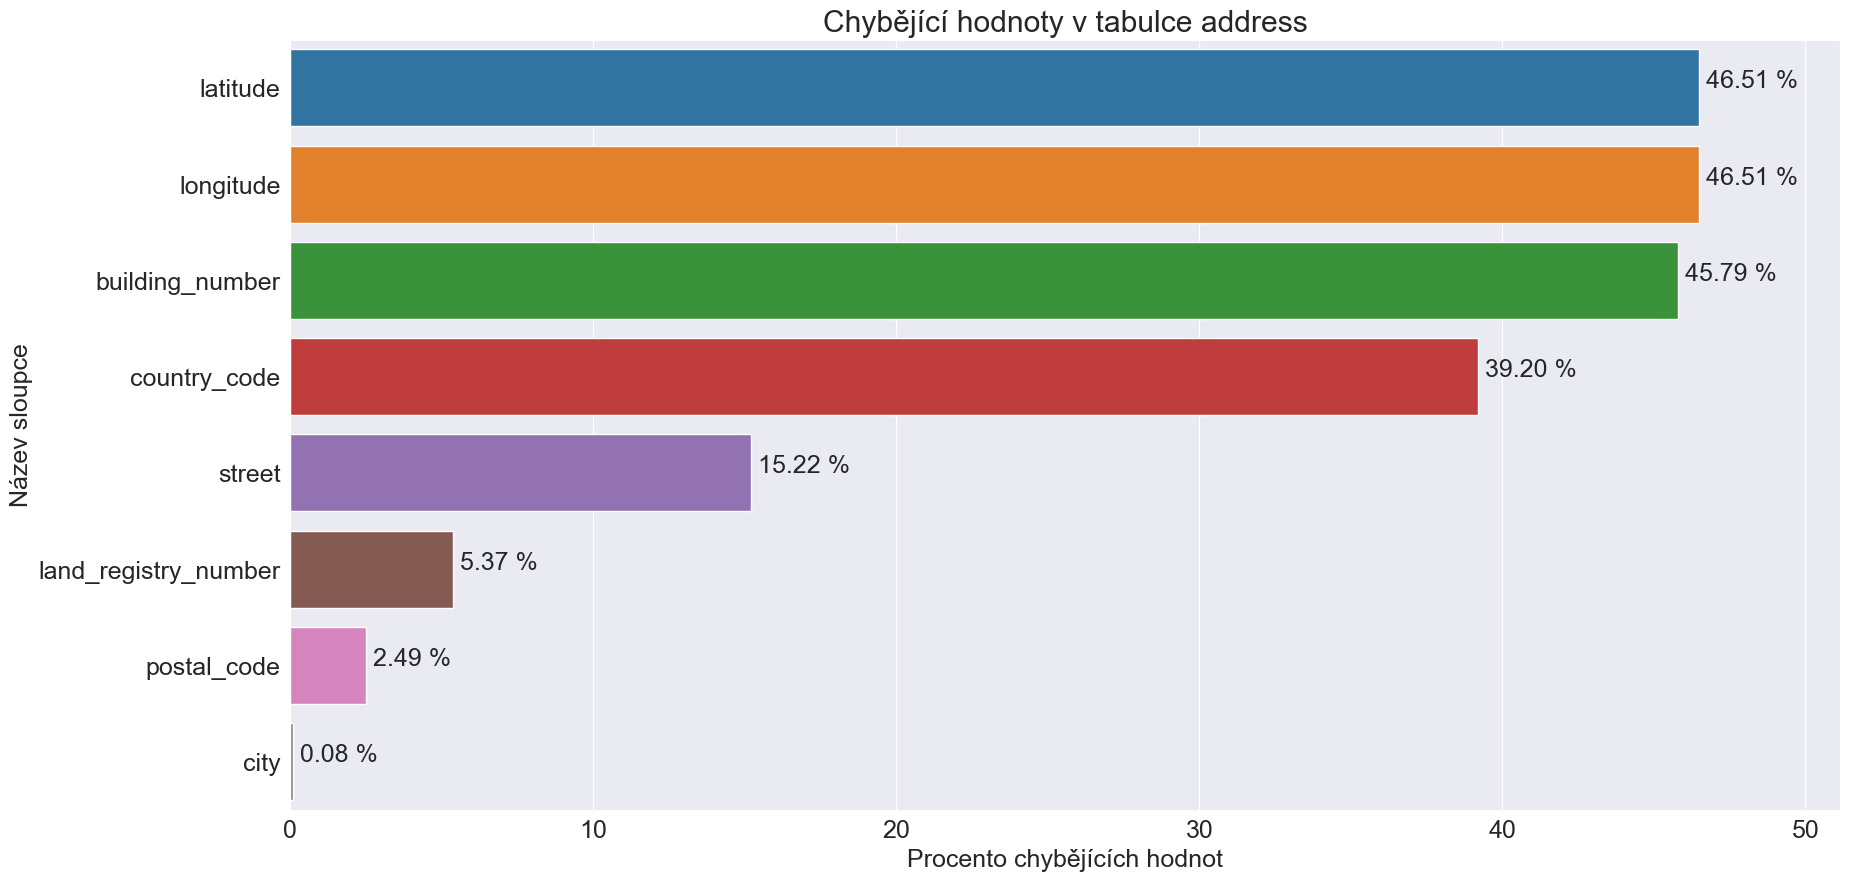

In [29]:
plot_missing_values(dataframes['address'], 'address')

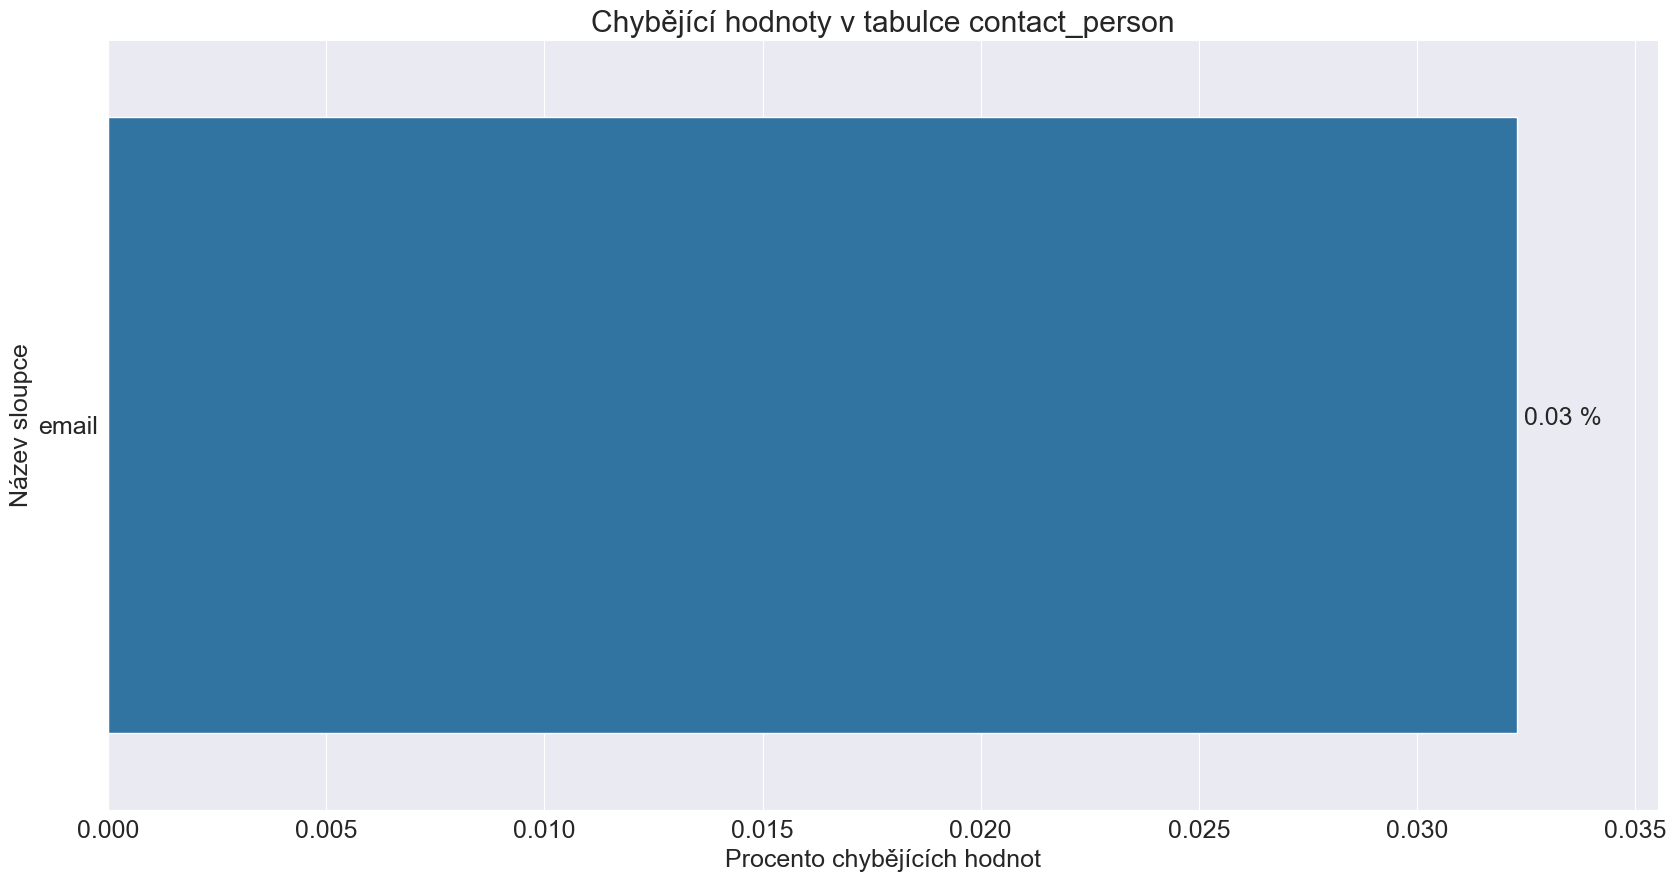

In [30]:
plot_missing_values(dataframes['contact_person'], 'contact_person')

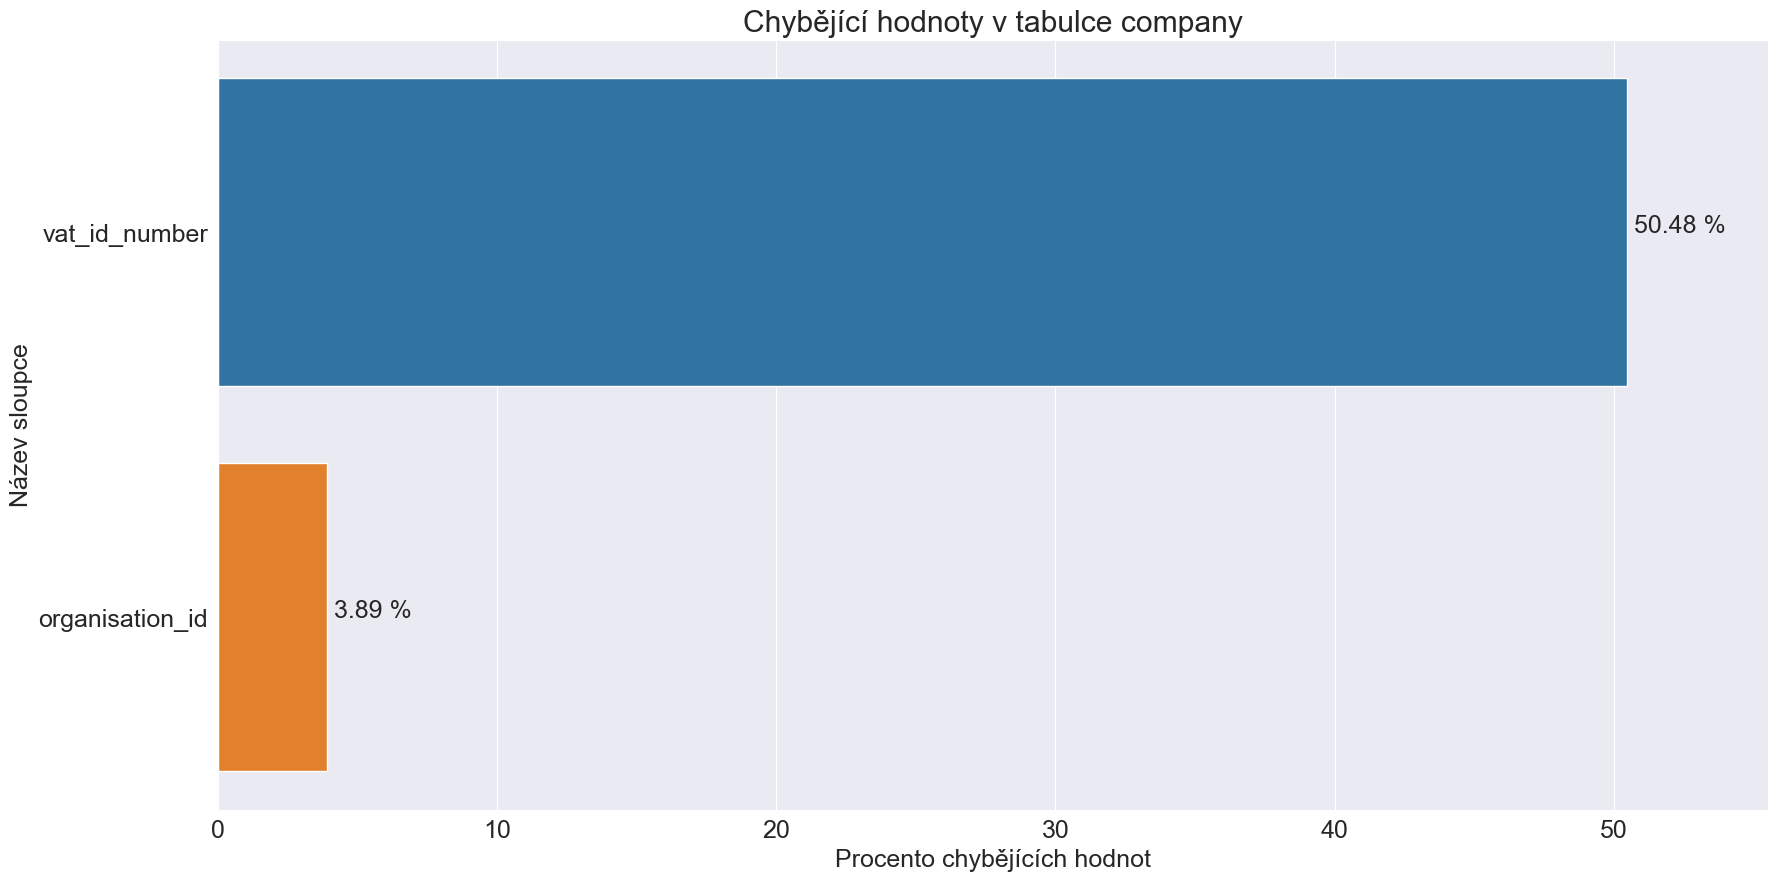

In [31]:
plot_missing_values(dataframes['company'], 'company')

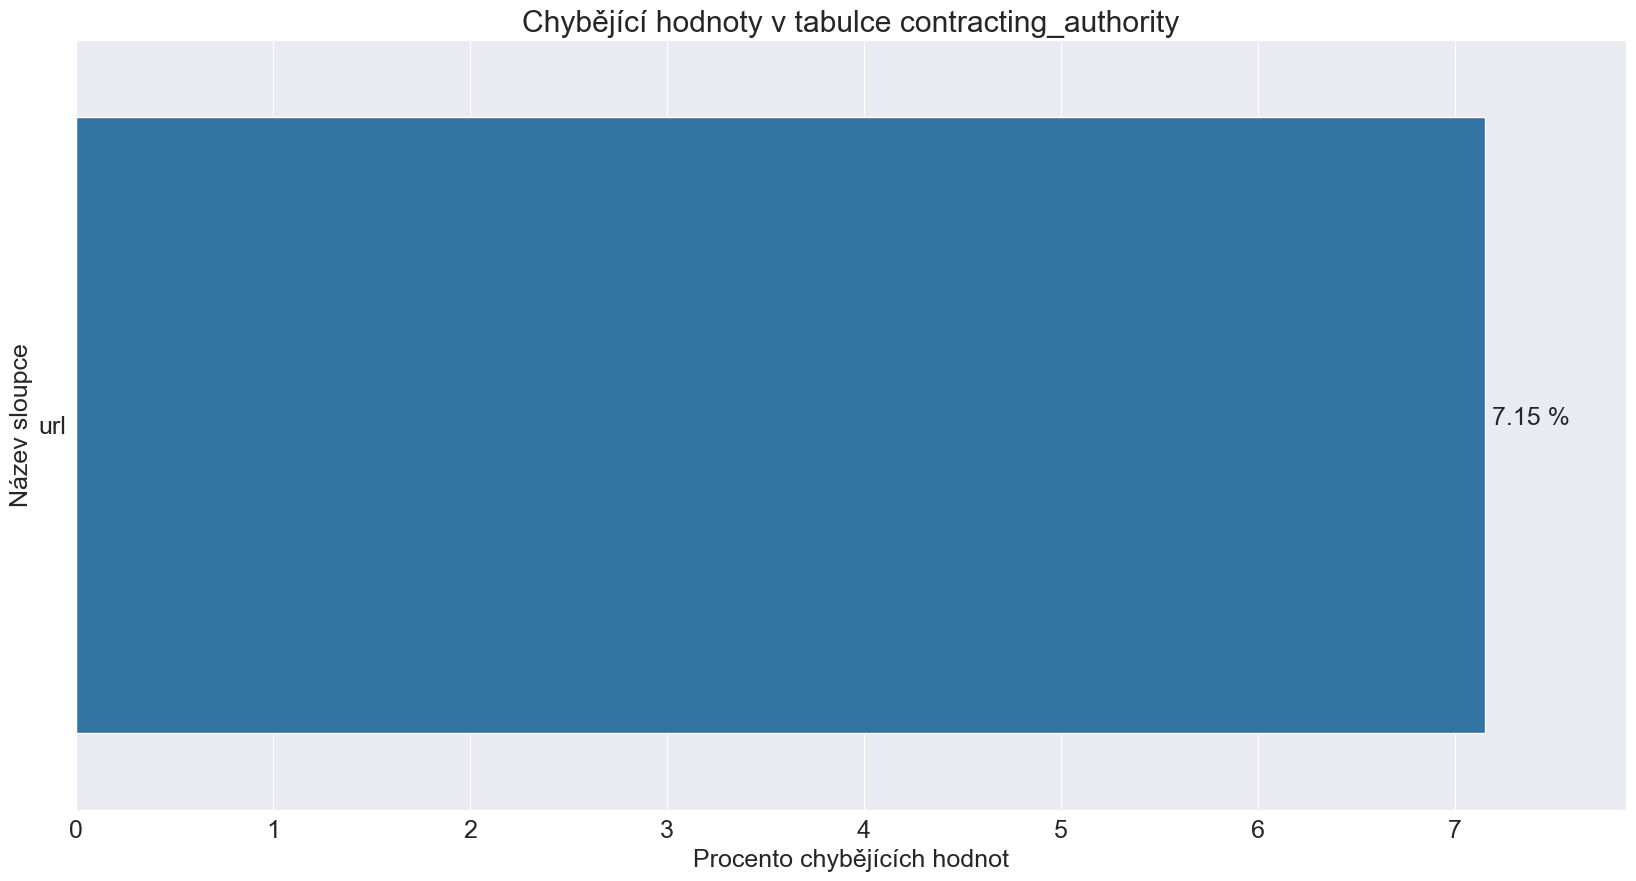

In [32]:
plot_missing_values(dataframes['contracting_authority'], 'contracting_authority')

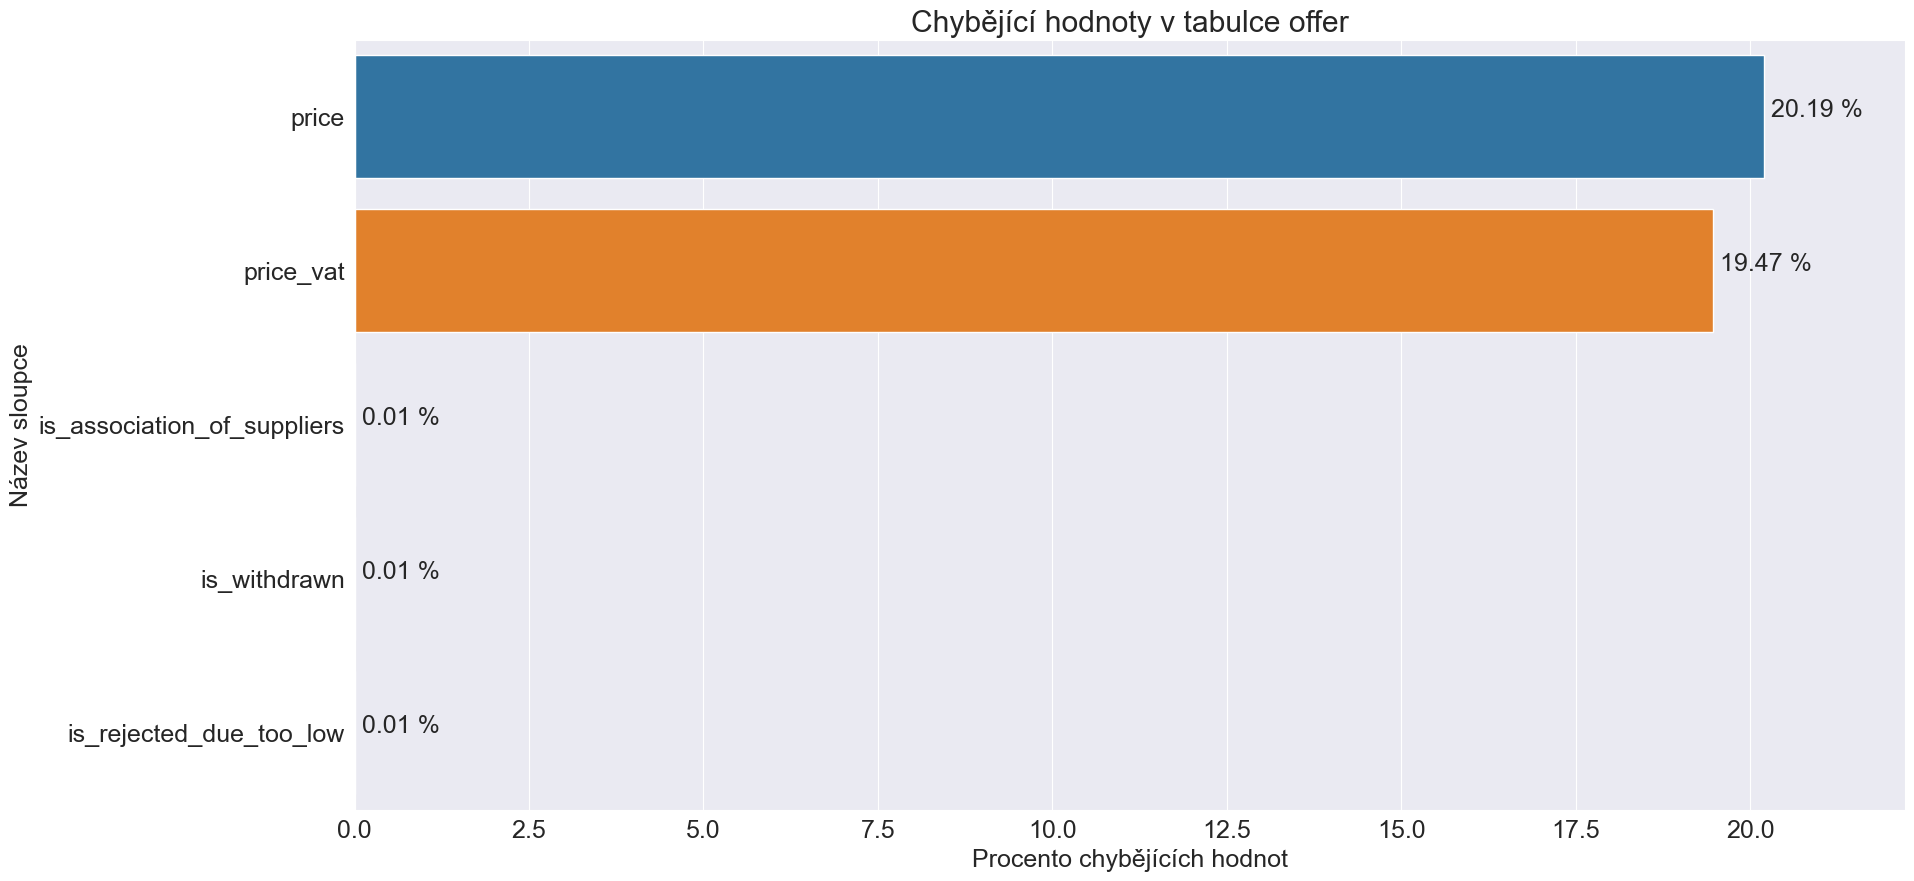

In [33]:
plot_missing_values(dataframes['offer'], 'offer')

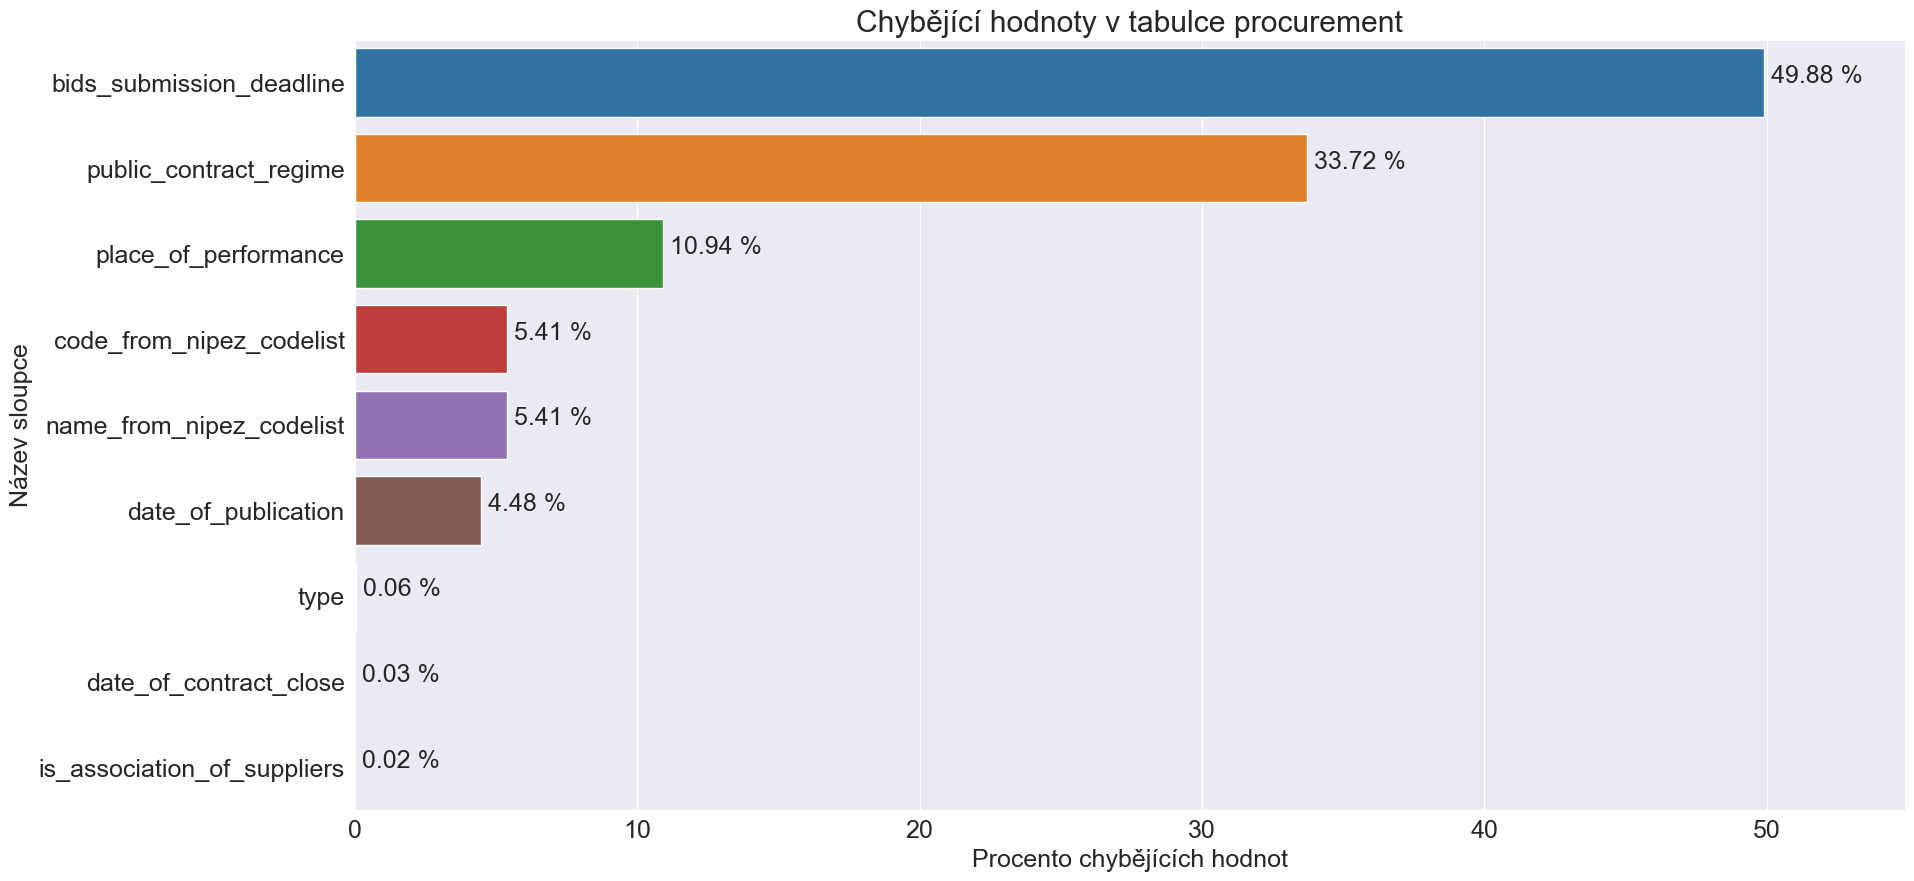

In [34]:
plot_missing_values(dataframes['procurement'], 'procurement')

Graf chybějících hodnot v tabulce procurement dle druhu zadávacího postupu:

In [35]:
grouped = dataframes['procurement'].groupby('type_of_procedure')

C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


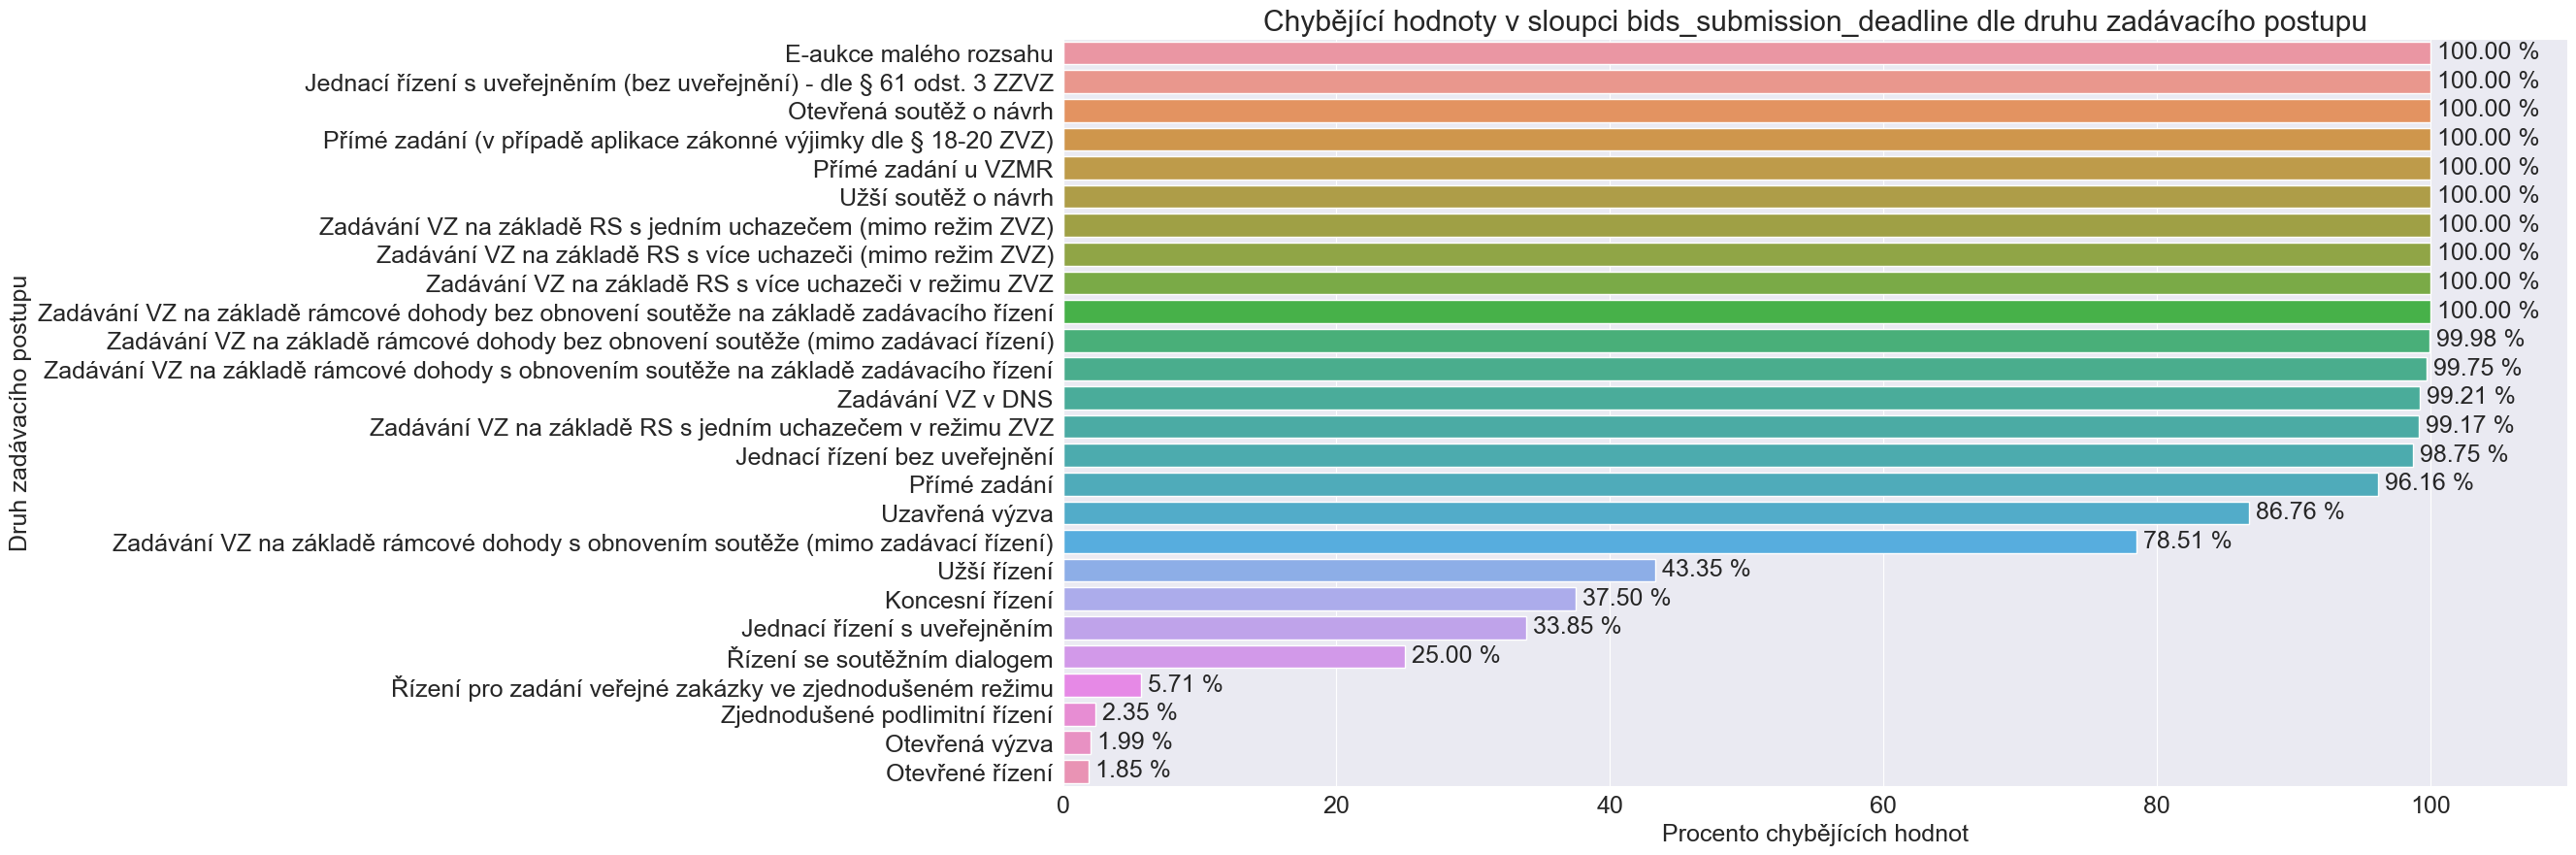

In [36]:
# for each group print percentage of missing values for column 'bids_submission_deadline'
# then print graph of missing values for column 'bids_submission_deadline' based on group sort by highest value on top

data_for_plot = {}
for name, group in grouped:
    data_for_plot[name] = group['bids_submission_deadline'].isna().sum() / group.shape[0] * 100
plt.figure(figsize=(20, 10))
data_for_plot = {k: v for k, v in sorted(data_for_plot.items(), key=lambda item: item[1], reverse=True)}
barplot = sns.barplot(x=list(data_for_plot.values()), y=list(data_for_plot.keys()))
for p in barplot.patches:
    width = p.get_width()
    plt.text(width,
             p.get_y() + p.get_height() / 2 + 0.2,
             ' {:1.2f} %'.format(width),
             ha = 'left')
plt.title('Chybějící hodnoty v sloupci bids_submission_deadline dle druhu zadávacího postupu')
plt.xlabel('Procento chybějících hodnot')
plt.ylabel('Druh zadávacího postupu')
plt.xlim(0, max(data_for_plot.values()) * 1.1)
plt.show()

Zobrazení VZ v otevřeném řízení s chybějící lhůtou pro podání nabídek seřazené podle ceny zakázky s DPH a dodatky sestupně:

In [37]:
grouped.groups.keys()
ot = grouped.get_group('Otevřené řízení')
ot[ot['bids_submission_deadline'].isna()].sort_values(by='contract_price_vat', ascending=False)

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,procurement_name,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id
31329,31403,NaN,NaN,2.796058e+09,3.075664e+09,2.796058e+09,3.075664e+09,2021-11-19,2023-03-16,False,Zajištění komplexní dodávky a distribuce léčiv...,NaN,NaN,NaN,N006/23/V00007207,Veřejná zakázka na dodávky,Otevřené řízení,1892,155,1379
31340,31414,NaN,NaN,4.674732e+08,5.656426e+08,4.674732e+08,5.656426e+08,2021-10-20,2022-03-16,False,Distribuce očkovací látky proti COVID-19 – Com...,NaN,NaN,NaN,N006/22/V00005964,Veřejná zakázka na služby,Otevřené řízení,1412,155,1379
5621,5655,NaN,33111610-0,1.440000e+08,1.742400e+08,1.440000e+08,1.742400e+08,2023-01-24,2022-10-17,False,Experimentální magnetická rezonance - systém 7T,Jednotka magnetické resonance,Hlavní město Praha,Nadlimitní veřejná zakázka,N006/22/V00027136,Veřejná zakázka na dodávky,Otevřené řízení,273,4,4307
9041,13995,NaN,NaN,9.917355e+07,1.200000e+08,9.917355e+07,1.200000e+08,2018-05-24,2019-09-23,False,Různé další speciální chemické látky a prostředky,NaN,NaN,NaN,N006/19/V00027242,Veřejná zakázka na dodávky,Otevřené řízení,1645,1,7597
27320,27354,NaN,44520000-1,2.319397e+07,2.806470e+07,2.319397e+07,2.806470e+07,2019-08-21,2023-04-24,False,Rámcová dohoda - Euroklíč pro ČR 2019 - 2023,"Zámky, klíče a panty",NaN,Nadlimitní veřejná zakázka,N006/23/V00011308,Veřejná zakázka na dodávky,Otevřené řízení,2951,1278,11131
31339,31413,NaN,NaN,2.047173e+07,2.477080e+07,2.047173e+07,2.477080e+07,2021-08-06,2022-03-16,False,Distribuce očkovacích látek proti COVID-19,NaN,NaN,NaN,N006/22/V00005954,Veřejná zakázka na služby,Otevřené řízení,1412,155,1379
12692,12684,NaN,33100000-1,1.786555e+07,2.161732e+07,1.786555e+07,2.161732e+07,2015-09-04,2015-06-03,False,Dodávka a servis CT přístroje,Zdravotnické přístroje,Zlínský kraj,Nadlimitní veřejná zakázka,N006/22/V00029607,Veřejná zakázka na dodávky,Otevřené řízení,1974,404,7252
21701,21674,NaN,NaN,1.782328e+07,2.049677e+07,1.782328e+07,2.049677e+07,2022-01-12,2022-01-17,False,Nakládání s ostatními a nebezpečnými odpady v ...,NaN,NaN,Nadlimitní veřejná zakázka,N006/22/V00000908,Veřejná zakázka na služby,Otevřené řízení,1427,1060,5756
21702,21675,NaN,NaN,1.782328e+07,2.049677e+07,1.782328e+07,2.049677e+07,2022-01-12,2022-01-17,False,Nakládání s ostatními a nebezpečnými odpady v ...,NaN,NaN,Nadlimitní veřejná zakázka,N006/22/V00000908,Veřejná zakázka na služby,Otevřené řízení,1427,1060,9582
445,472,NaN,72000000-5,1.614300e+07,1.953303e+07,1.614300e+07,1.953303e+07,2023-10-25,2023-11-29,False,Rámcová dohoda - Řečové technologie - Část A,"Informační technologie: poradenství, vývoj pro...",Česká republika,NaN,N006/23/V00023568,Veřejná zakázka na služby,Otevřené řízení,205,110,557


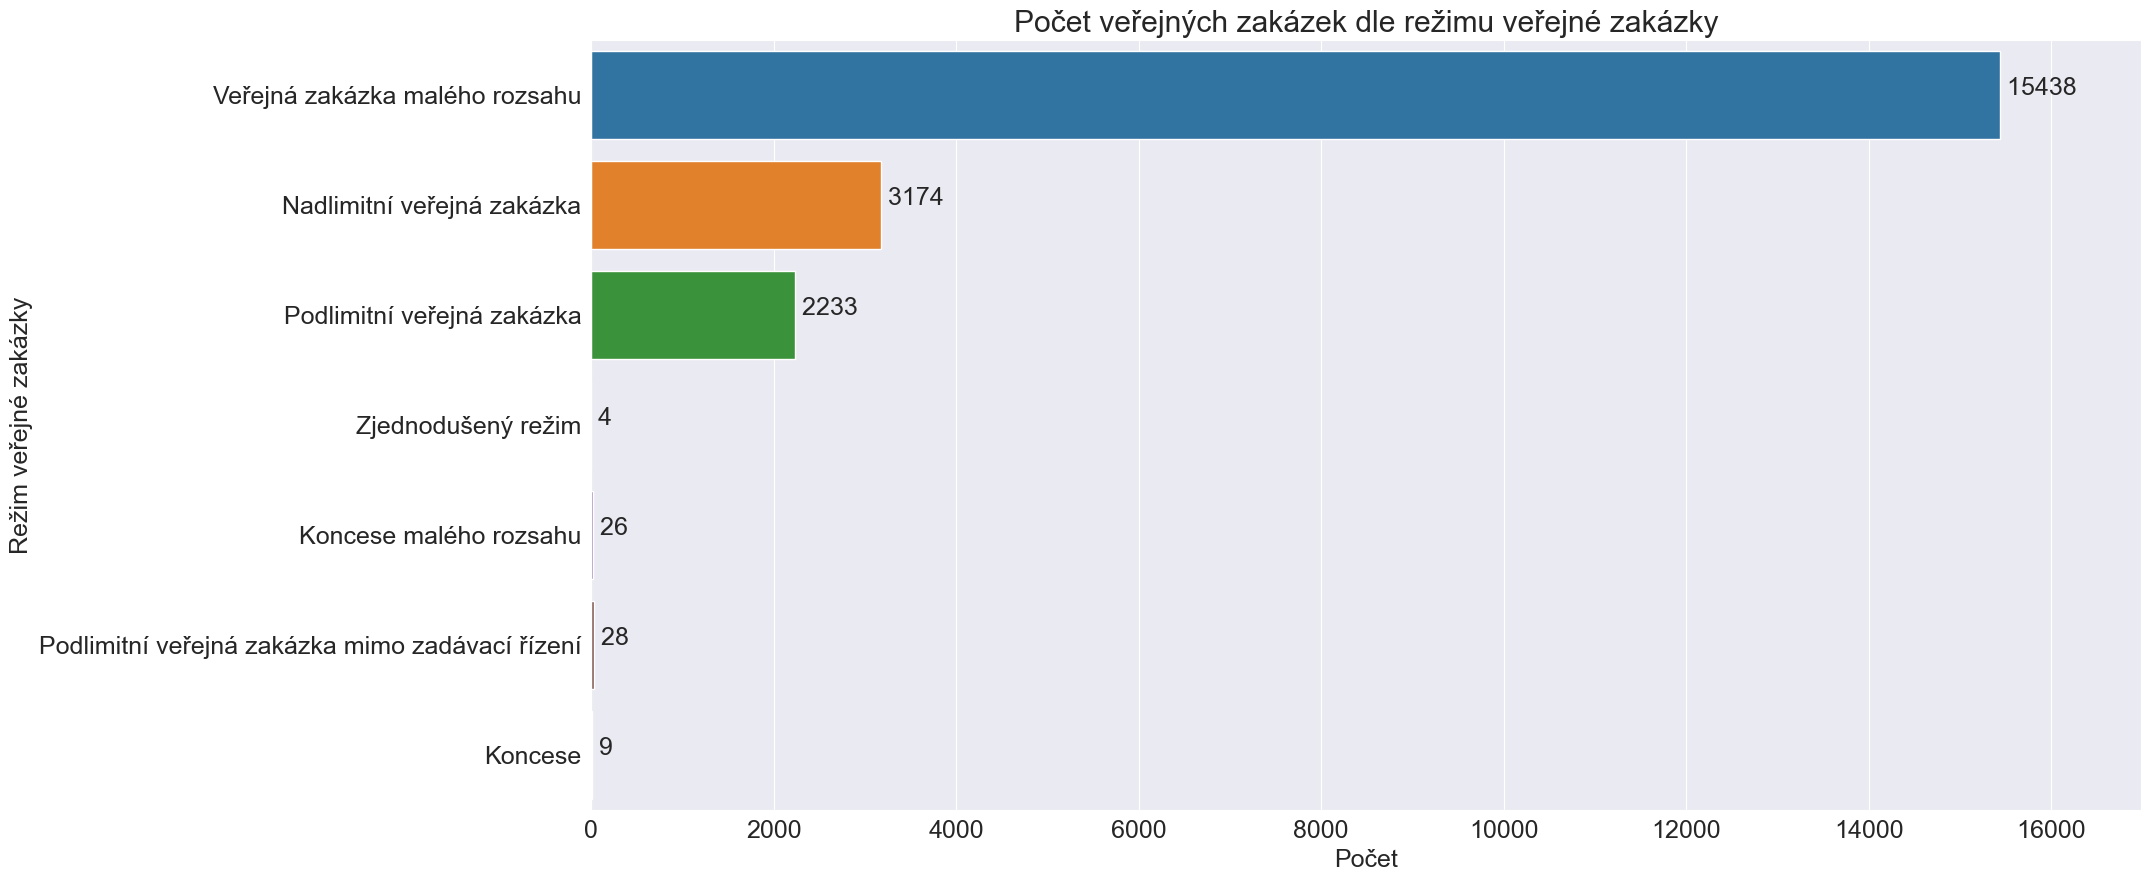

In [38]:
plt.figure(figsize=(20, 10))
barplot = sns.countplot(y='public_contract_regime', data=dataframes['procurement'])
plt.title('Počet veřejných zakázek dle režimu veřejné zakázky')
plt.xlabel('Počet')
plt.ylabel('Režim veřejné zakázky')
plt.xlim(0, dataframes['procurement']['public_contract_regime'].value_counts().max() * 1.1)
for p in barplot.patches:
    width = p.get_width()
    barplot.text(width,
                 p.get_y() + p.get_height() / 2,
                 ' {:1.0f}'.format(width),
                 ha = 'left')
plt.show()

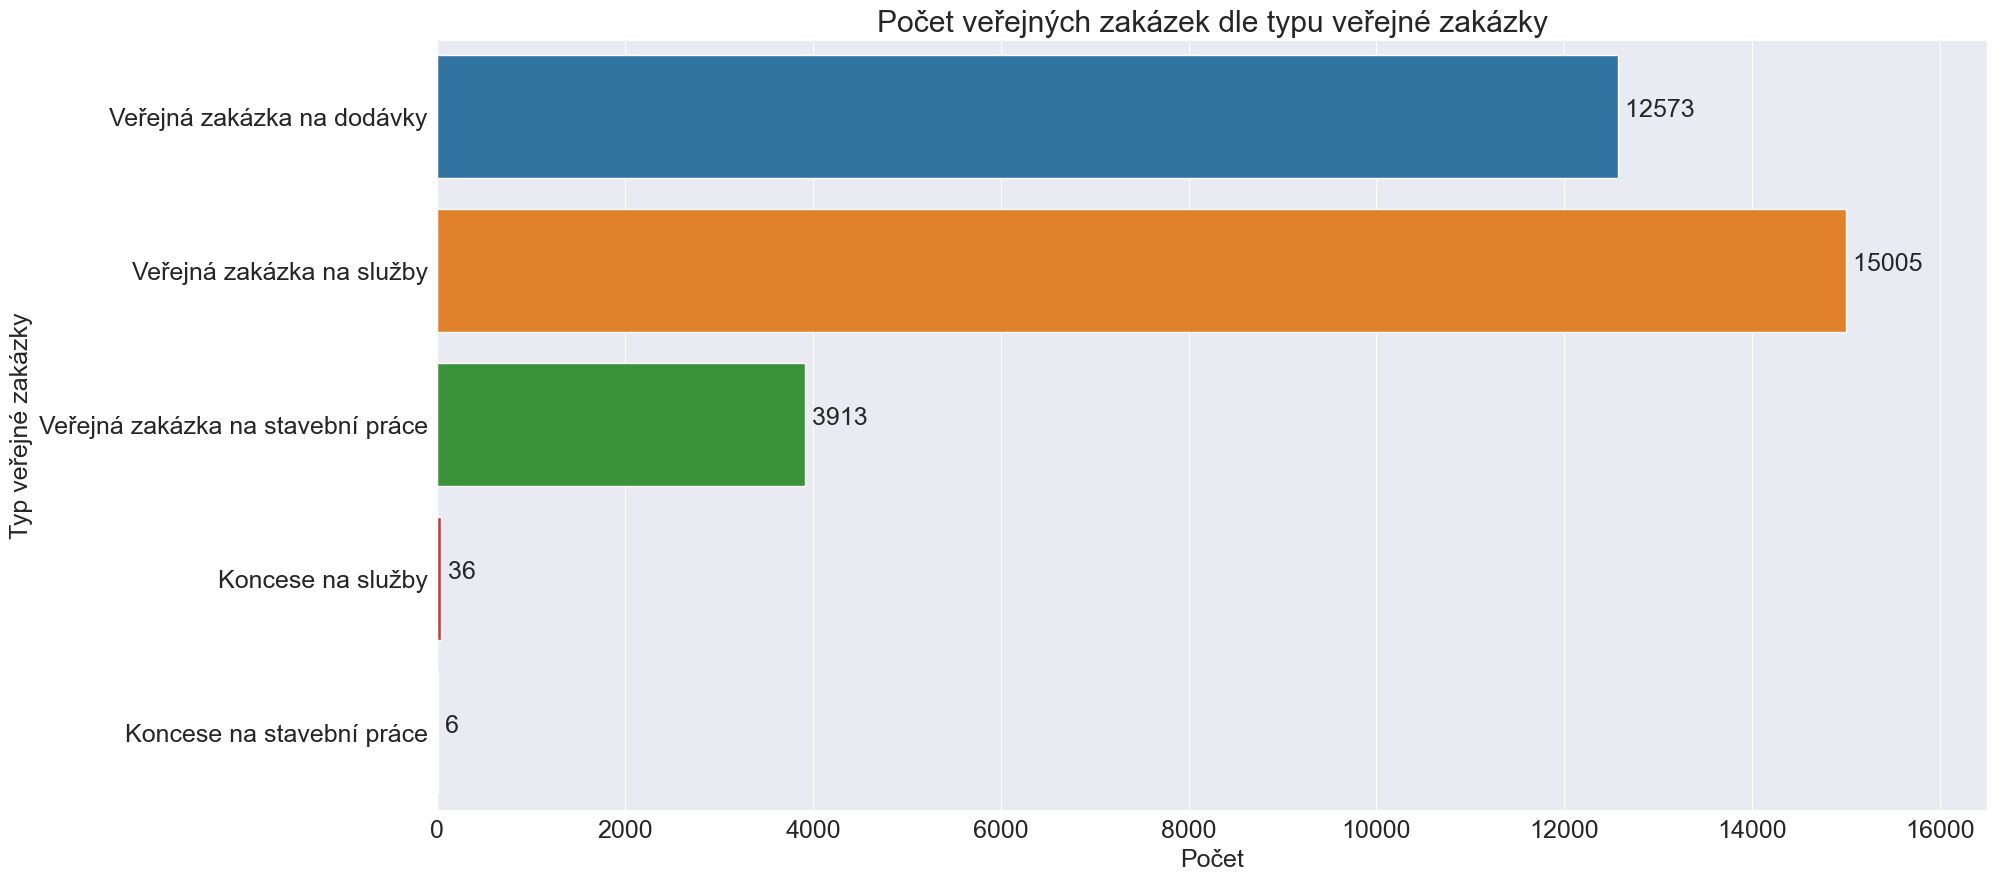

In [58]:
plt.figure(figsize=(20, 10))
barplot = sns.countplot(y='type', data=dataframes['procurement'])
# apply translation
#barplot.set_yticklabels([dict_type[y.get_text()] for y in barplot.get_yticklabels()])
plt.title('Počet veřejných zakázek dle typu veřejné zakázky')
plt.ylabel('Typ veřejné zakázky')
plt.xlabel('Počet')
plt.xlim(0, dataframes['procurement']['type'].value_counts().max() * 1.1)
for p in barplot.patches:
    width = p.get_width()
    barplot.text(width,
                 p.get_y() + p.get_height() / 2,
                 ' {:1.0f}'.format(width),
                 ha = 'left')

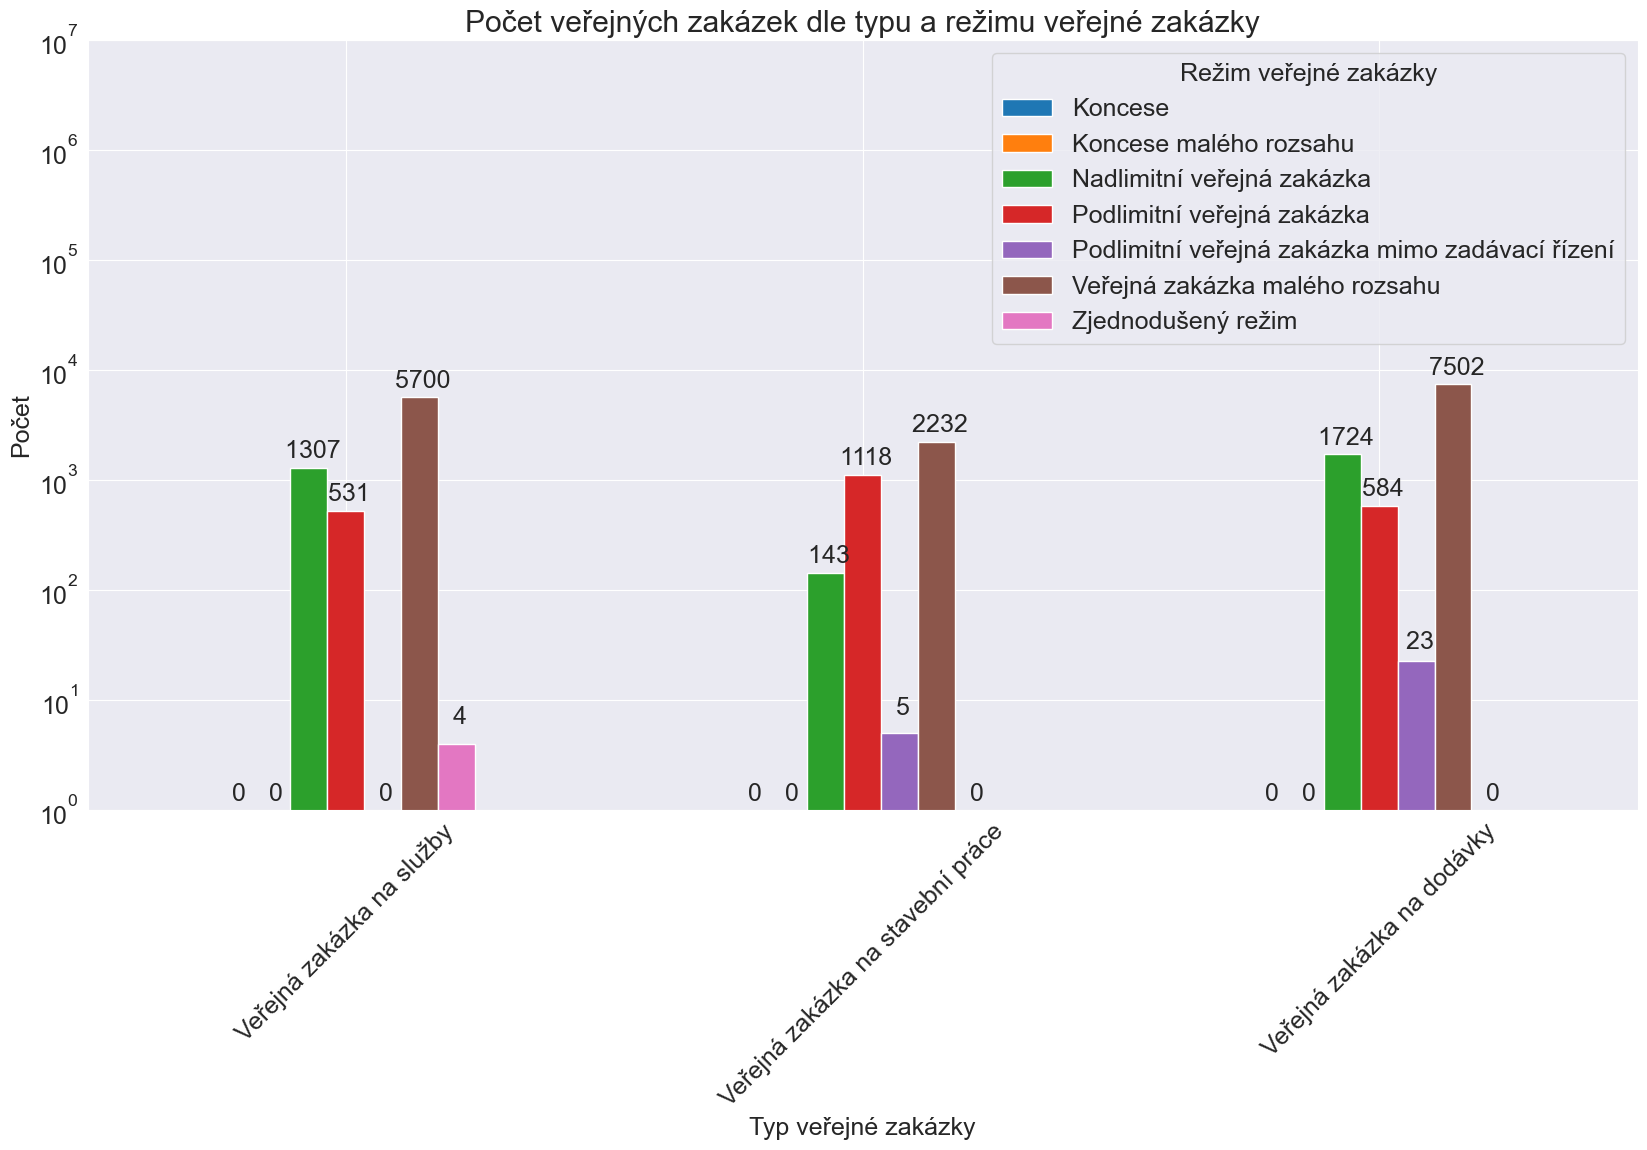

In [59]:
data = dataframes['procurement'].groupby(['type', 'public_contract_regime']).size().unstack().sort_values(by='Nadlimitní veřejná zakázka', ascending=False)
# selekce pouze tří nejčastějších typů veřejných zakázek 
data = data.loc[['Veřejná zakázka na služby', 'Veřejná zakázka na stavební práce', 'Veřejná zakázka na dodávky']]
width = 0.5
half_width = width / 2
barplot = data.plot(kind='bar', figsize=(20, 10), width=0.5)
# logarimtická škála na y-ové ose
plt.yscale('log')


l = plt.legend()
l.set_title('Režim veřejné zakázky')
plt.xticks(rotation=45)
# přidání hodnot na sloupce
for p in barplot.patches:
    width = p.get_width()
    plt.text((p.get_x() + width / 2),
             (p.get_height() + 1) * 1.1,
             ' {:1.0f}'.format(p.get_height()),
             ha = 'center', va = 'bottom')


plt.title('Počet veřejných zakázek dle typu a režimu veřejné zakázky')
plt.xlabel('Typ veřejné zakázky')
plt.ylabel('Počet')
plt.ylim(1, 10e6)
plt.show()
        



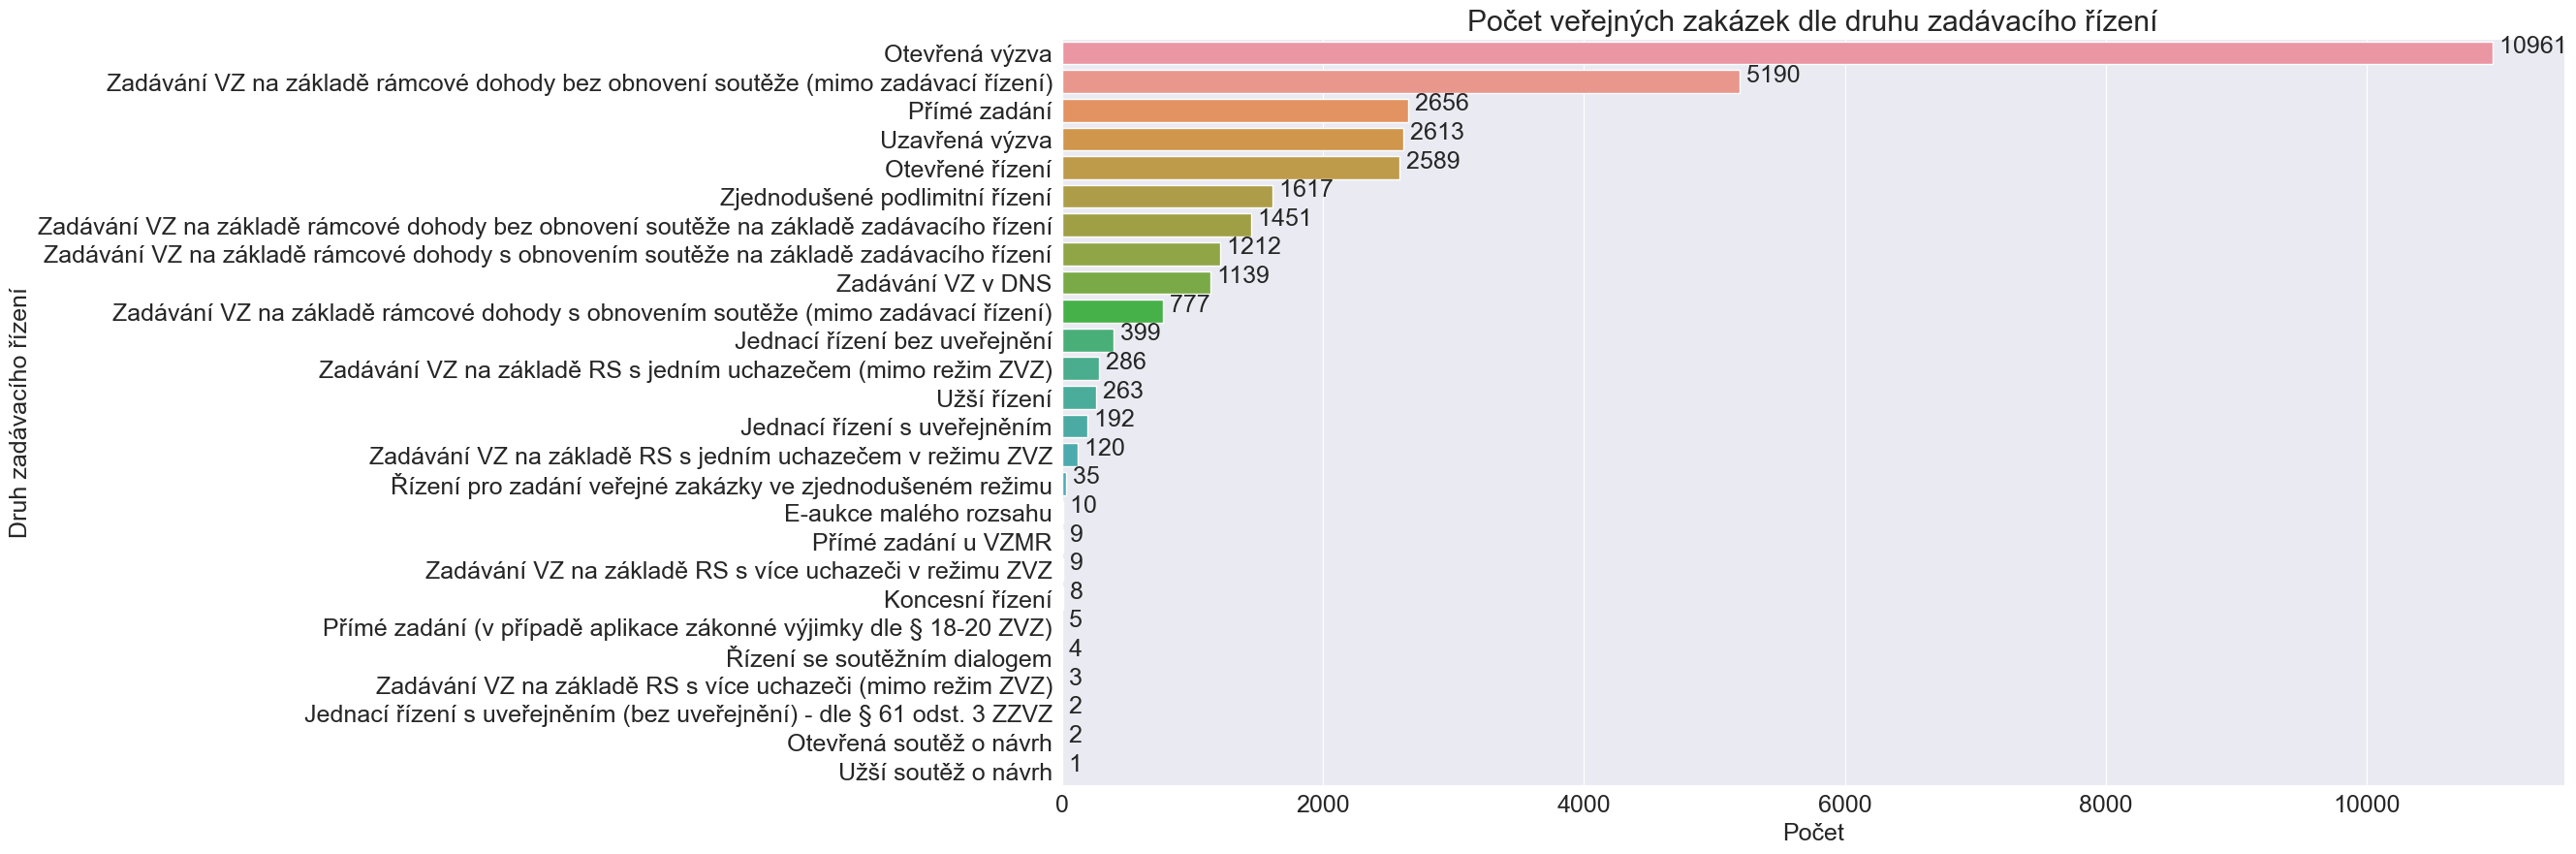

In [60]:
data_tmp = dataframes['procurement']["type_of_procedure"].value_counts().sort_values(ascending=False)

data_tmp = data_tmp.reset_index()
data_tmp.columns = ['type_of_procedure', 'count']

plt.figure(figsize=(20, 10))
barplot = sns.barplot(y='type_of_procedure', x='count', data=data_tmp, order=data_tmp['type_of_procedure'])
plt.title('Počet veřejných zakázek dle druhu zadávacího řízení')
plt.xlabel('Počet')
plt.ylabel('Druh zadávacího řízení')


for p in barplot.patches:
    width = p.get_width()
    plt.text(width,
             p.get_y() + p.get_height() / 2,
             ' {:1.0f}'.format(width),
             ha = 'left')

plt.show()

Nadlimitní veřejné zakázky v režimu přímého zadání: 

In [61]:
view = dataframes['procurement'].loc[dataframes['procurement']['type_of_procedure'] == 'Přímé zadání']
view["public_contract_regime"].value_counts()
view[view["public_contract_regime"] == 'Nadlimitní veřejná zakázka']


,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,procurement_name,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id
3115,7110,NaN,NaN,4.000000e+08,4.840000e+08,4.000000e+08,4.840000e+08,2020-10-09,NaN,False,Nákup munice 2019/III - 122 KS - RD,NaN,NaN,Nadlimitní veřejná zakázka,N006/23/V00007884,Veřejná zakázka na dodávky,Přímé zadání,97,1,1920
3175,3173,NaN,64200000-8,5.808000e+06,7.027680e+06,5.808000e+06,7.027680e+06,2023-11-13,NaN,False,Mobilní telekomunikační služby_(CNS_MF ČR),Telekomunikační služby,Česká republika,Nadlimitní veřejná zakázka,N006/22/V00012130,Veřejná zakázka na služby,Přímé zadání,473,240,121
6113,7024,NaN,NaN,1.652893e+09,2.000000e+09,1.652893e+09,2.000000e+09,2021-11-30,NaN,False,Nákup munice 2022/I - malorážová RD,NaN,NaN,Nadlimitní veřejná zakázka,N006/23/V00007865,Veřejná zakázka na dodávky,Přímé zadání,97,1,5081
13223,13276,NaN,22000000-0,1.288000e+07,1.558400e+07,1.288000e+07,1.558400e+07,2022-07-18,2022-07-25,False,Výroba a dodání Vízových štítků pro OAMP,Tiskařské výrobky a související produkty,Hlavní město Praha,Nadlimitní veřejná zakázka,N006/22/V00016474,Veřejná zakázka na dodávky,Přímé zadání,745,144,1764
18099,18126,NaN,70220000-9,1.422537e+07,1.721270e+07,1.422537e+07,1.721270e+07,2023-07-25,2023-08-30,False,Smlouva o nájmu kancelářských prostor,Pronájem nebo leasing nebytových nemovitostí,Hlavní město Praha,Nadlimitní veřejná zakázka,N006/23/V00024107,Veřejná zakázka na služby,Přímé zadání,2439,88,8777
22326,22274,NaN,45214620-2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019-01-17,NaN,False,Projekt HotBENT - Nagra,Výstavba výzkumných a testovacích zařízení,Switzerland,Nadlimitní veřejná zakázka,N006/19/V00002471,Veřejná zakázka na služby,Přímé zadání,651,267,9885
30556,30623,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018-10-08,2018-12-11,False,Smlouva o nájmu samostatné části prostor Alter...,NaN,NaN,Nadlimitní veřejná zakázka,N006/18/V00027182,Veřejná zakázka na služby,Přímé zadání,651,267,9914
30589,30656,NaN,73000000-2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019-09-27,2019-10-21,False,Projekt MaCoTe II - Koroze,Výzkum a vývoj a související služby,Switzerland,Nadlimitní veřejná zakázka,N006/19/V00030475,Veřejná zakázka na dodávky,Přímé zadání,651,267,9885


Shlukování kódů NIPEZ podle prvních dvou znaků (obecnější kategorie):

In [62]:
procurement_view = dataframes['procurement']
procurement_view['code'] = procurement_view['code_from_nipez_codelist'].str[:2]
procurement_view

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,code
0,1,NaN,15710000-8,38973.48,44820.00,38973.48,44820.00,2022-03-02,2022-03-02,False,...,Průmyslová krmiva pro hospodářská a jiná zvířata,Liberecký kraj,NaN,N006/22/V00004456,Veřejná zakázka na dodávky,Zadávání VZ na základě rámcové dohody bez obno...,1,1,1,15
1,2,NaN,50110000-9,9832.02,11896.74,9832.02,11896.74,2023-11-23,2023-11-30,False,...,Opravy a údržba motorových vozidel a příslušen...,Jihočeský kraj,NaN,N006/23/V00033550,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,2,1,2,50
2,3,NaN,NaN,130000.00,130000.00,130000.00,130000.00,2022-02-24,2022-03-02,False,...,NaN,NaN,Veřejná zakázka malého rozsahu,N006/22/V00004676,Veřejná zakázka na dodávky,Otevřená výzva,1,1,3,NaN
3,4,NaN,90511000-2,26580.00,32161.80,26580.00,32161.80,2022-03-07,2022-03-07,False,...,Sběr odpadu,Liberecký kraj,NaN,N006/22/V00004924,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,1,1,4,90
4,5,NaN,90500000-2,8468.00,9314.80,8468.00,9314.80,2023-10-24,2023-10-24,False,...,Služby související s likvidací odpadů a odpady,Středočeský kraj,NaN,N006/23/V00030140,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,3,1,5,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31548,31623,NaN,90500000-2,0.00,0.00,0.00,0.00,2020-06-24,2021-03-22,False,...,Služby související s likvidací odpadů a odpady,Hlavní město Praha,Veřejná zakázka malého rozsahu,N006/21/V00006509,Veřejná zakázka na služby,Uzavřená výzva,3174,420,1162,90
31549,31624,NaN,30121100-4,0.00,0.00,0.00,0.00,2021-06-10,2021-06-20,False,...,Fotokopírovací stroje,Hlavní město Praha,Veřejná zakázka malého rozsahu,N006/21/V00015961,Veřejná zakázka na dodávky,Uzavřená výzva,3174,420,585,30
31550,31625,NaN,09123000-7,0.00,0.00,0.00,0.00,2020-07-03,2020-07-30,False,...,Zemní plyn,Česká republika,Nadlimitní veřejná zakázka,N006/20/V00019093,Veřejná zakázka na dodávky,Jednací řízení bez uveřejnění,1559,179,874,09
31551,31626,2023-03-01,50100000-6,141855.33,171644.95,141855.33,171644.95,2023-03-14,2023-02-15,False,...,Opravy a údržba vozidel a příslušenství k nim ...,Jihozápad,Veřejná zakázka malého rozsahu,N006/23/V00002968,Veřejná zakázka na služby,Otevřená výzva,897,1,12336,50


Příklad špatných cen s DPH:

In [63]:
wrong_vat = dataframes['procurement'][dataframes['procurement']['contract_price_with_amendments_vat'] / dataframes['procurement']['contract_price_with_amendments'] > 1.211]
wrong_vat.sort_values(by='contract_price_with_amendments_vat', ascending=False)

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,code
1393,1400,2023-03-10,38110000-9,1.939812e+08,4.553075e+14,1.939812e+08,4.553075e+14,2023-06-29,2023-02-10,False,...,Navigační přístroje,Pardubický kraj,Nadlimitní veřejná zakázka,N006/23/V00003252,Veřejná zakázka na dodávky,Otevřené řízení,531,1,1475,38
10077,10127,2021-06-21,18331000-8,5.800000e+07,7.064458e+12,5.800000e+07,7.064458e+12,2021-08-12,2021-05-10,False,...,Trička s krátkým rukávem (T-shirts),Česká republika,Nadlimitní veřejná zakázka,N006/21/V00008639,Veřejná zakázka na dodávky,Otevřené řízení,1829,110,3267,18
26489,26530,NaN,NaN,1.957937e+06,4.638558e+12,1.957937e+06,4.638558e+12,2023-05-03,2023-05-04,False,...,NaN,NaN,NaN,N006/23/V00012432,Veřejná zakázka na stavební práce,Uzavřená výzva,2915,804,7838,NaN
27746,27746,2023-03-08,72300000-8,1.730709e+07,3.624397e+12,1.730709e+07,3.624397e+12,2023-04-12,2023-02-02,False,...,Datové služby,Hlavní město Praha,Nadlimitní veřejná zakázka,N006/23/V00001306,Veřejná zakázka na služby,Otevřené řízení,1150,166,972,72
30707,30774,2021-10-15,72222300-0,1.702050e+07,3.505356e+12,1.702050e+07,3.505356e+12,2022-04-01,2021-08-23,False,...,Služby informačních technologií,Česká republika,Nadlimitní veřejná zakázka,N006/21/V00020484,Veřejná zakázka na služby,Otevřené řízení,1559,179,2150,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31288,31363,NaN,NaN,3.300000e+02,4.000000e+02,3.300000e+02,4.000000e+02,2021-12-28,2023-03-16,False,...,NaN,NaN,NaN,N006/23/V00007134,Veřejná zakázka na dodávky,Uzavřená výzva,2496,1083,12280,NaN
27730,27730,2020-07-21,79713000-5,2.163000e+01,1.246300e+02,2.163000e+01,1.246300e+02,2020-08-17,2020-07-07,False,...,Strážní služby,Jihomoravský kraj,Veřejná zakázka malého rozsahu,N006/20/V00013509,Veřejná zakázka na služby,Otevřená výzva,1512,605,1517,79
6834,6831,2023-04-13,30120000-6,1.600000e+00,1.940000e+00,1.600000e+00,1.940000e+00,2023-04-24,2023-03-31,False,...,Zařízení pro fotokopírování a ofsetové tiskařs...,Česká republika,Veřejná zakázka malého rozsahu,N006/23/V00008616,Veřejná zakázka na služby,Otevřená výzva,563,99,585,30
22914,22976,2023-05-23,09310000-5,1.230000e+00,1.490000e+00,1.230000e+00,1.490000e+00,2023-06-15,2023-04-20,False,...,Elektrická energie,Olomoucký kraj,Nadlimitní veřejná zakázka,N006/23/V00010837,Veřejná zakázka na dodávky,Otevřené řízení,1960,805,874,09


Odstranění řádků s chybnými cenami s DPH:

In [64]:
dataframes['procurement'].drop(wrong_vat.index, inplace=True)

Nové statistiky po odstranění špatných cen s DPH pro tabulku procurement:

In [65]:
basic_stats(dataframes['procurement'])

Počet řádek je 31463 a počet sloupců je 21
Statitiky pro číselné příznaky:


,id,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,contact_person_id,contracting_authority_id,supplier_id
count,31463.000000,3.146300e+04,3.146300e+04,3.146300e+04,3.146300e+04,31463.000000,31463.000000,31463.000000
mean,15843.221053,7.750968e+06,9.247200e+06,7.850865e+06,9.367668e+06,924.769316,154.164956,2946.705654
std,9114.908568,1.078742e+08,1.282497e+08,1.082823e+08,1.287504e+08,775.569780,236.413128,3177.517827
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,7965.500000,1.200000e+04,1.421145e+04,1.200000e+04,1.422960e+04,293.000000,1.000000,481.000000
50%,15851.000000,1.701700e+05,2.016525e+05,1.704388e+05,2.019248e+05,695.000000,77.000000,1659.000000
75%,23729.500000,1.192255e+06,1.426225e+06,1.194557e+06,1.427878e+06,1418.000000,191.000000,4449.000000
max,31627.000000,1.239521e+10,1.499820e+10,1.239521e+10,1.499820e+10,3174.000000,1364.000000,12336.000000


Chybějící hodnoty v %:


id                                     0.000000
bids_submission_deadline              49.890347
code_from_nipez_codelist               5.399994
contract_price                         0.000000
contract_price_vat                     0.000000
contract_price_with_amendments         0.000000
contract_price_with_amendments_vat     0.000000
date_of_contract_close                 0.031783
date_of_publication                    4.478276
is_association_of_suppliers            0.022248
procurement_name                       0.000000
name_from_nipez_codelist               5.399994
place_of_performance                  10.914407
public_contract_regime                33.722150
system_number                          0.000000
type                                   0.063567
type_of_procedure                      0.000000
contact_person_id                      0.000000
contracting_authority_id               0.000000
supplier_id                            0.000000
code                                   5

Příklad záznamů z tabulky:


,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,code
0,1,NaN,15710000-8,38973.48,44820.00,38973.48,44820.00,2022-03-02,2022-03-02,False,...,Průmyslová krmiva pro hospodářská a jiná zvířata,Liberecký kraj,NaN,N006/22/V00004456,Veřejná zakázka na dodávky,Zadávání VZ na základě rámcové dohody bez obno...,1,1,1,15
1,2,NaN,50110000-9,9832.02,11896.74,9832.02,11896.74,2023-11-23,2023-11-30,False,...,Opravy a údržba motorových vozidel a příslušen...,Jihočeský kraj,NaN,N006/23/V00033550,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,2,1,2,50
2,3,NaN,NaN,130000.00,130000.00,130000.00,130000.00,2022-02-24,2022-03-02,False,...,NaN,NaN,Veřejná zakázka malého rozsahu,N006/22/V00004676,Veřejná zakázka na dodávky,Otevřená výzva,1,1,3,NaN
3,4,NaN,90511000-2,26580.00,32161.80,26580.00,32161.80,2022-03-07,2022-03-07,False,...,Sběr odpadu,Liberecký kraj,NaN,N006/22/V00004924,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,1,1,4,90
4,5,NaN,90500000-2,8468.00,9314.80,8468.00,9314.80,2023-10-24,2023-10-24,False,...,Služby související s likvidací odpadů a odpady,Středočeský kraj,NaN,N006/23/V00030140,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,3,1,5,90
5,6,NaN,24612000-7,90525.00,109535.25,90525.00,109535.25,2022-03-31,2022-04-01,False,...,Různé výbušniny,Liberecký kraj,NaN,N006/22/V00007031,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,1,1,6,24
6,7,NaN,15710000-8,103600.35,119141.40,103600.35,119141.40,2022-04-01,2022-04-01,False,...,Průmyslová krmiva pro hospodářská a jiná zvířata,Liberecký kraj,NaN,N006/22/V00007590,Veřejná zakázka na dodávky,Zadávání VZ na základě rámcové dohody bez obno...,1,1,7,15
7,8,NaN,15710000-8,23508.00,27034.20,23508.00,27034.20,2022-04-28,2022-05-03,False,...,Průmyslová krmiva pro hospodářská a jiná zvířata,Liberecký kraj,NaN,N006/22/V00009380,Veřejná zakázka na dodávky,Zadávání VZ na základě rámcové dohody bez obno...,1,1,8,15
8,9,NaN,45000000-7,1078673.00,1305194.33,1078673.00,1305194.33,2023-11-24,2023-11-30,False,...,Stavební práce,Plzeňský kraj,Veřejná zakázka malého rozsahu,N006/23/V00034233,Veřejná zakázka na stavební práce,Uzavřená výzva,4,2,9,45
9,10,NaN,03322000-2,130000.00,130000.00,130000.00,130000.00,2022-03-31,2022-04-21,False,...,Hospodářská zvířata,NaN,Veřejná zakázka malého rozsahu,N006/22/V00009384,Veřejná zakázka na dodávky,Otevřená výzva,1,1,10,03


Celková cena veřejných zakázek s DPH a dodatky:

In [66]:
price_vat_sum = dataframes['procurement']['contract_price_with_amendments_vat'].sum()
print(f"Celková cena veřejných zakázek s DPH a dodatky je {price_vat_sum:,} Kč")

Celková cena veřejných zakázek s DPH a dodatky je 294,734,950,313.46 Kč


Procento veřejných zakázek s cenou 0:

In [67]:
percentage_0 = dataframes['procurement'][dataframes['procurement']['contract_price_with_amendments_vat'] == 0].shape[0] / dataframes['procurement'].shape[0] * 100
print(f"Procento veřejných zakázek s cenou 0 je {percentage_0:.2f} %")

Procento veřejných zakázek s cenou 0 je 10.75 %


Procento odlehlých hodnot v ceně veřejných zakázek s DPH a dodatky, určených pomocí metody IQR:

In [68]:
Q1 = dataframes['procurement']['contract_price_with_amendments_vat'].quantile(0.25)
Q3 = dataframes['procurement']['contract_price_with_amendments_vat'].quantile(0.75)
IQR = Q3 - Q1
outliers = dataframes['procurement'][(dataframes['procurement']['contract_price_with_amendments_vat'] < (Q1 - 1.5 * IQR)) | (dataframes['procurement']['contract_price_with_amendments_vat'] > (Q3 + 1.5 * IQR))]
display(outliers.sort_values(by='contract_price_with_amendments_vat', ascending=False))
print(f"Procento odlehlých hodnot: {outliers.shape[0] / dataframes['procurement'].shape[0] * 100:.2f} %")

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,code
14352,14403,2023-08-16,45252300-1,1.239521e+10,1.499820e+10,1.239521e+10,1.499820e+10,2023-09-26,2020-12-21,True,...,Výstavba spaloven odpadů,Středočeský kraj,Nadlimitní veřejná zakázka,N006/20/V00030842,Veřejná zakázka na stavební práce,Jednací řízení s uveřejněním,2229,70,112,45
27335,27369,NaN,09123000-7,7.024773e+09,8.499983e+09,7.024773e+09,8.499983e+09,2022-04-29,2022-05-04,False,...,Zemní plyn,Česká republika,Nadlimitní veřejná zakázka,N006/22/V00009480,Veřejná zakázka na dodávky,Jednací řízení bez uveřejnění,419,175,3509,09
26033,26072,2023-02-14,60210000-3,5.684083e+09,5.684083e+09,5.684083e+09,5.684083e+09,2023-05-02,2022-10-31,False,...,Služby veřejné železniční dopravy,Česká republika,Nadlimitní veřejná zakázka,N006/22/V00028809,Veřejná zakázka na služby,Otevřené řízení,2895,379,10843,60
25796,25835,2023-02-13,44610000-9,3.798000e+09,4.595580e+09,3.798000e+09,4.595580e+09,2023-05-09,2022-03-11,False,...,"Nádrže, zásobníky, podobné nádoby a tlakové ná...",Jihočeský kraj,Nadlimitní veřejná zakázka,N006/22/V00005142,Veřejná zakázka na dodávky,Jednací řízení s uveřejněním,2888,70,463,44
30054,30120,2022-10-24,45000000-7,3.146685e+09,3.807489e+09,3.146685e+09,3.807489e+09,2023-02-23,2022-07-04,True,...,Stavební práce,Liberecký kraj,Nadlimitní veřejná zakázka,N006/22/V00017355,Veřejná zakázka na stavební práce,Otevřené řízení,3087,322,4849,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,2816,2023-10-06,48822000-6,2.939764e+06,3.557114e+06,2.939764e+06,3.557114e+06,2023-10-23,2023-09-07,False,...,Počítačové servery,Hlavní město Praha,Nadlimitní veřejná zakázka,N006/23/V00019089,Veřejná zakázka na dodávky,Otevřené řízení,108,81,398,48
5711,5743,NaN,45212350-4,2.938908e+06,3.556078e+06,2.938908e+06,3.556078e+06,2023-05-18,2023-05-22,False,...,Historicky nebo architektonicky mimořádně zají...,Plzeňský kraj,NaN,N006/23/V00014158,Veřejná zakázka na stavební práce,Uzavřená výzva,1319,543,3295,45
7816,7843,2023-07-13,45232400-6,2.938068e+06,3.555062e+06,2.938068e+06,3.555062e+06,2023-08-31,2023-06-28,False,...,Stavební práce na výstavbě kanalizace,Liberecký kraj,Veřejná zakázka malého rozsahu,N006/23/V00017384,Veřejná zakázka na stavební práce,Otevřená výzva,527,261,5443,45
22717,22643,2021-09-03,37481000-3,2.938000e+06,3.554980e+06,2.938000e+06,3.554980e+06,2021-10-21,2021-08-17,False,...,Stroje na úpravu ledových ploch,Pardubický kraj,Podlimitní veřejná zakázka,N006/21/V00021335,Veřejná zakázka na dodávky,Zjednodušené podlimitní řízení,766,344,9961,37


Procento odlehlých hodnot: 13.95 %


Příprava dat pro vizualizaci bez odlehlých hodnot:

In [69]:
data_witout_outliers = dataframes['procurement'][~dataframes['procurement'].index.isin(outliers.index)]

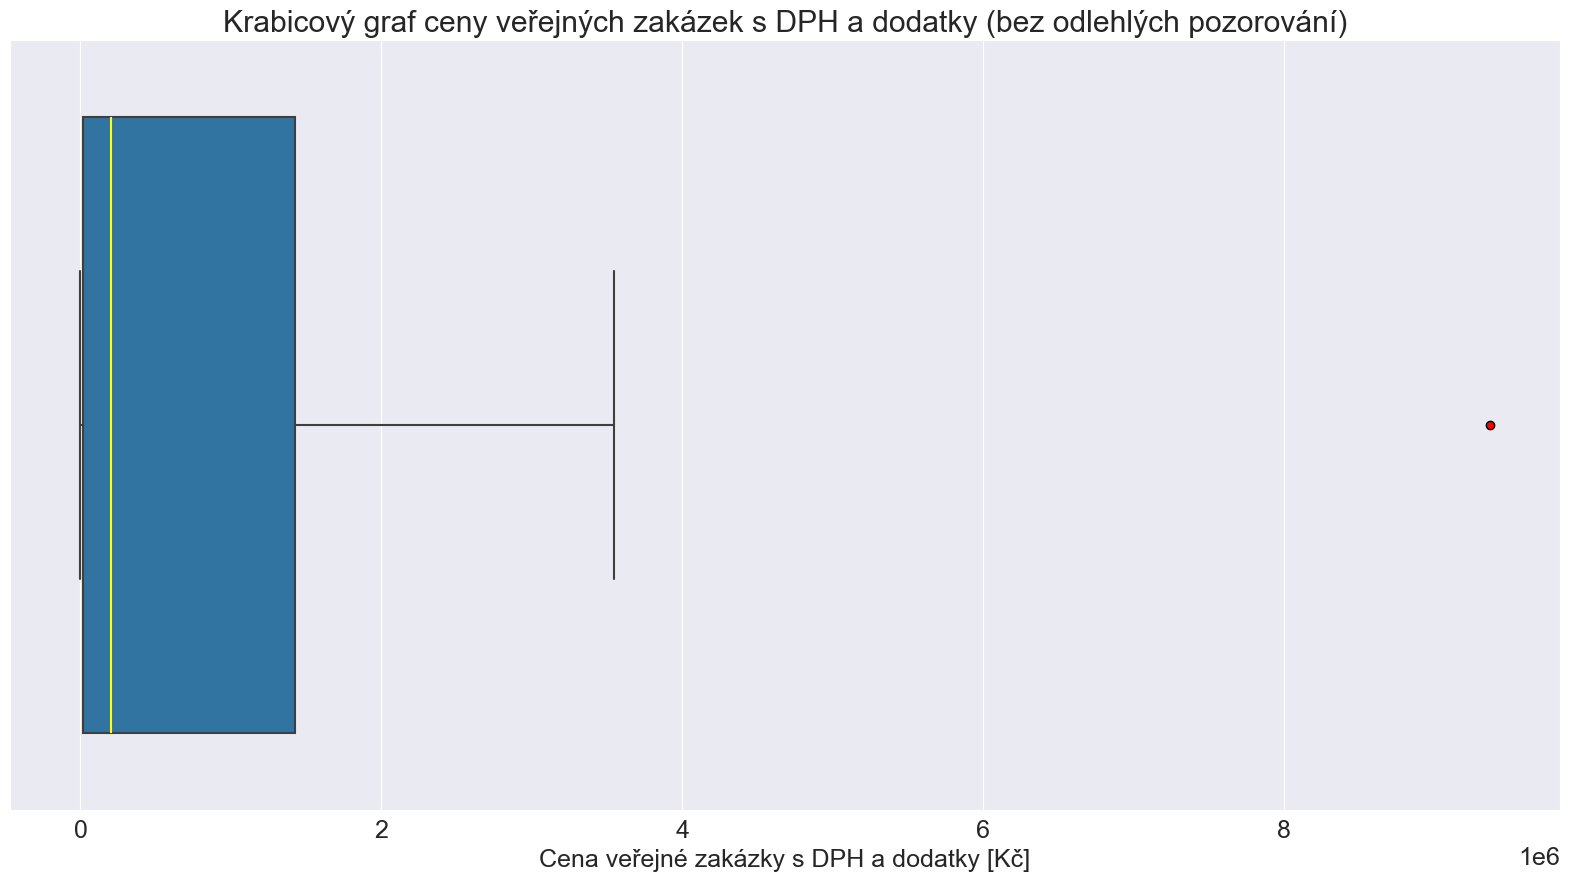

In [70]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=dataframes['procurement'], x='contract_price_with_amendments_vat', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'))
plt.title('Krabicový graf ceny veřejných zakázek s DPH a dodatky (bez odlehlých pozorování)')
plt.xlabel('Cena veřejné zakázky s DPH a dodatky [Kč]')
plt.show()

C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


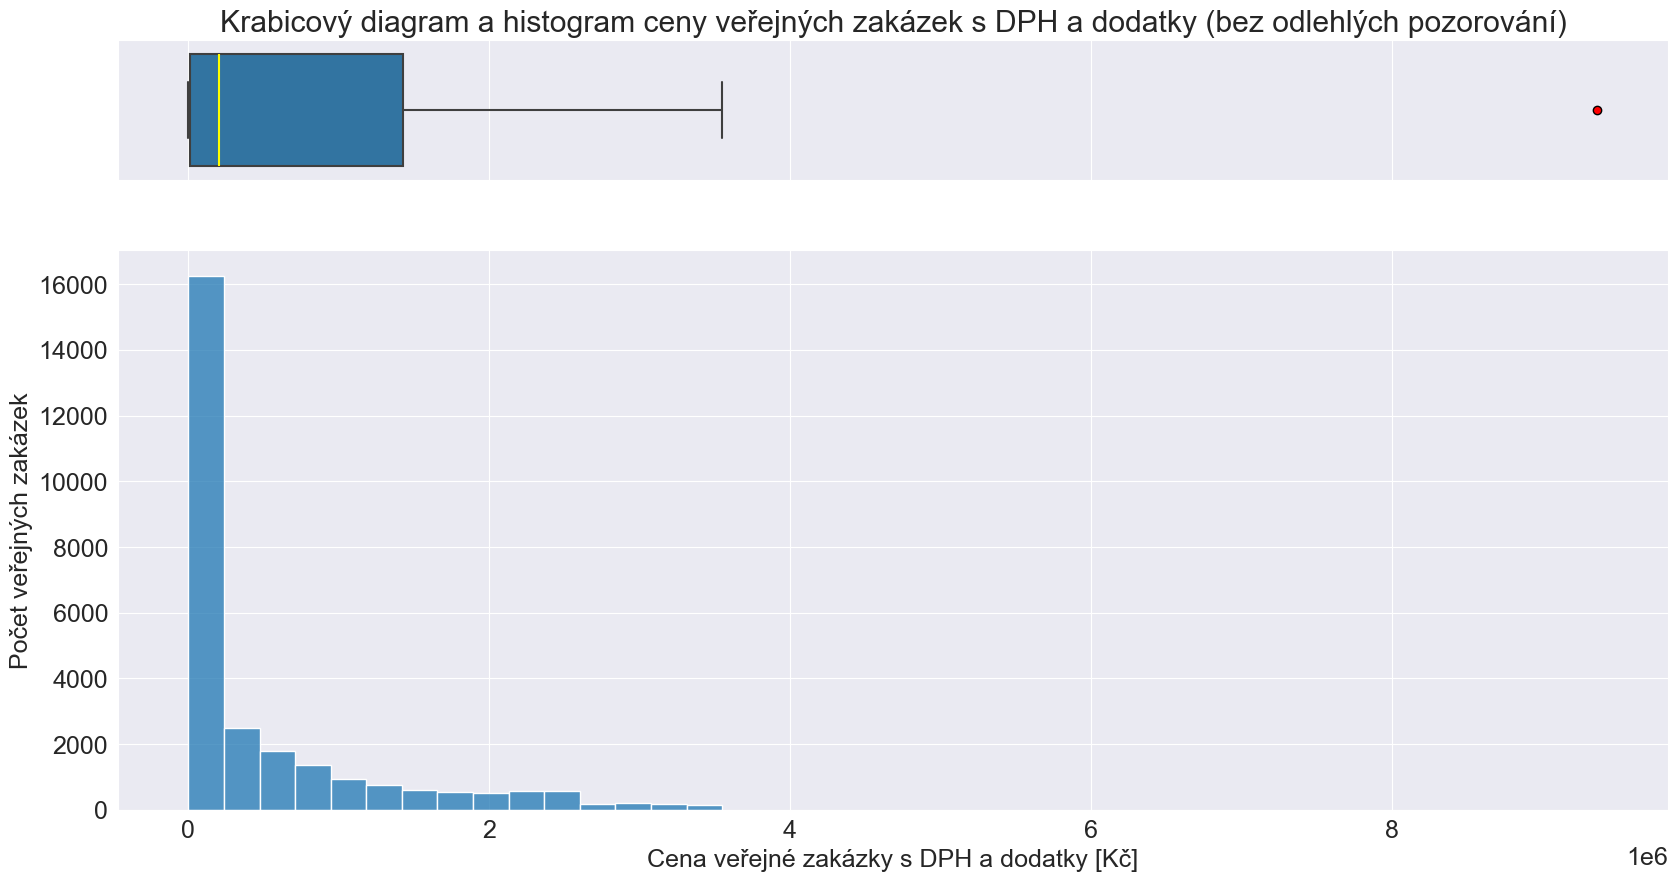

In [71]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(20, 10))
 
# Box plot
sns.boxplot(ax=ax_box,data=dataframes['procurement'], x='contract_price_with_amendments_vat', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'))
ax_box.set(xlabel='')
ax_hist.set_xlabel('Cena veřejné zakázky s DPH a dodatky [Kč]')
ax_hist.set_ylabel('Počet veřejných zakázek')
ax_box.set_title('Krabicový diagram a histogram ceny veřejných zakázek s DPH a dodatky (bez odlehlých pozorování)')

# Histogram
sns.histplot(ax=ax_hist, data=data_witout_outliers, x='contract_price_with_amendments_vat', bins=int(1 + np.log2(data_witout_outliers.shape[0])))
plt.show()

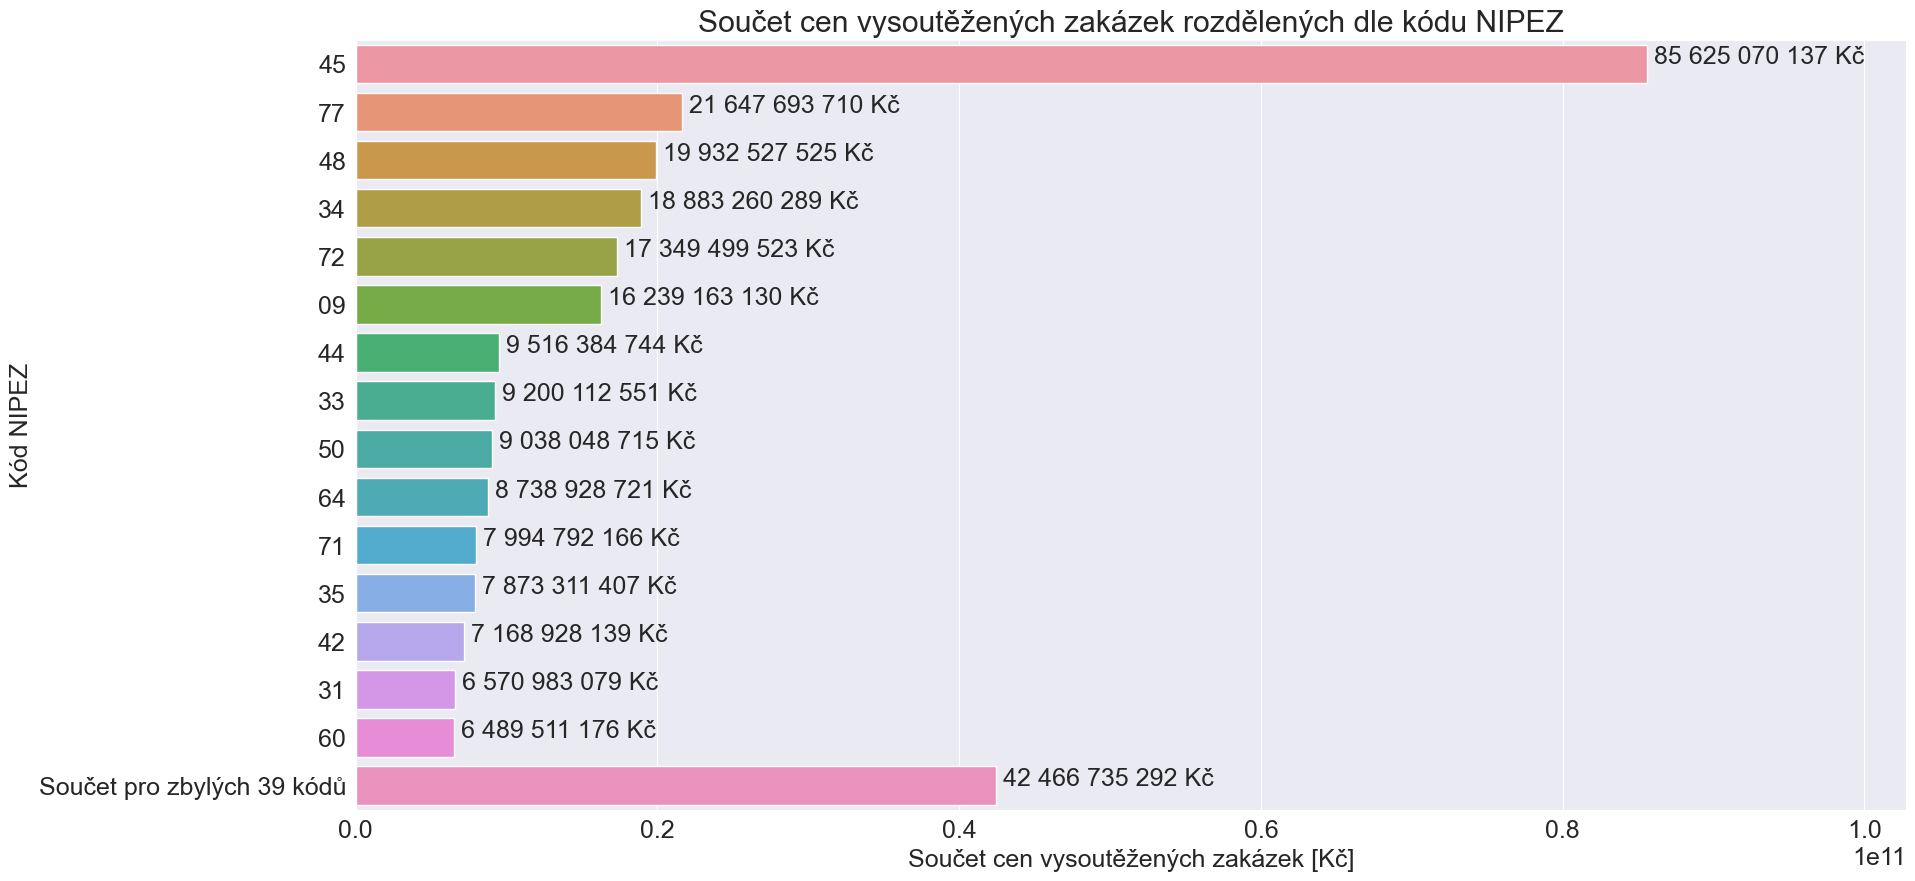

In [72]:
# Seskupení podle kódu NIPEZ a výpočet součtu cen s DPH a dodatky
n=15
procurement_view_grouped = procurement_view.groupby('code')['contract_price_with_amendments_vat'].sum().reset_index()
m=procurement_view_grouped.shape[0]
# Seřazení podle 'contract_price_with_amendments' sestupně a výběr prvních n kategorií
procurement_view_sorted = procurement_view_grouped.sort_values(by='contract_price_with_amendments_vat', ascending=False).head(n)

# Výpočet celkové sumy cen s DPH a dodatky
total_sum = procurement_view['contract_price_with_amendments_vat'].sum()

# Výpočet sumy cen s DPH a dodatky pro prvních n kategorií
top_n_sum = procurement_view_sorted['contract_price_with_amendments_vat'].sum()

# Výpočet sumy cen s DPH a dodatky pro zbylé kategorie
rest_sum = total_sum - top_n_sum

# Vytvoření nového řádku pro zbylé kategorie
procurement_view_sorted.loc[len(procurement_view_sorted.index)] = ({'code': "Součet pro zbylých {} kódů".format(m-n), 'contract_price_with_amendments_vat': rest_sum})

# Vykreslení sloupcového grafu
plt.figure(figsize=(20, 10))
barplot = sns.barplot(y='code', x='contract_price_with_amendments_vat', data=procurement_view_sorted, errorbar=None)
plt.title('Součet cen vysoutěžených zakázek rozdělených dle kódu NIPEZ')
plt.ylabel('Kód NIPEZ')
plt.xlabel('Součet cen vysoutěžených zakázek [Kč]')
plt.xlim(0, procurement_view_sorted['contract_price_with_amendments_vat'].max() * 1.2)
for p in barplot.patches:
    width = p.get_width()
    formatted_width = '{:,}'.format(int(width)).replace(',', ' ')  # Format the sum with spaces
    plt.text(width,
             p.get_y() + p.get_height() / 2,
             ' {} Kč'.format(formatted_width),
             ha = 'left')
plt.show()

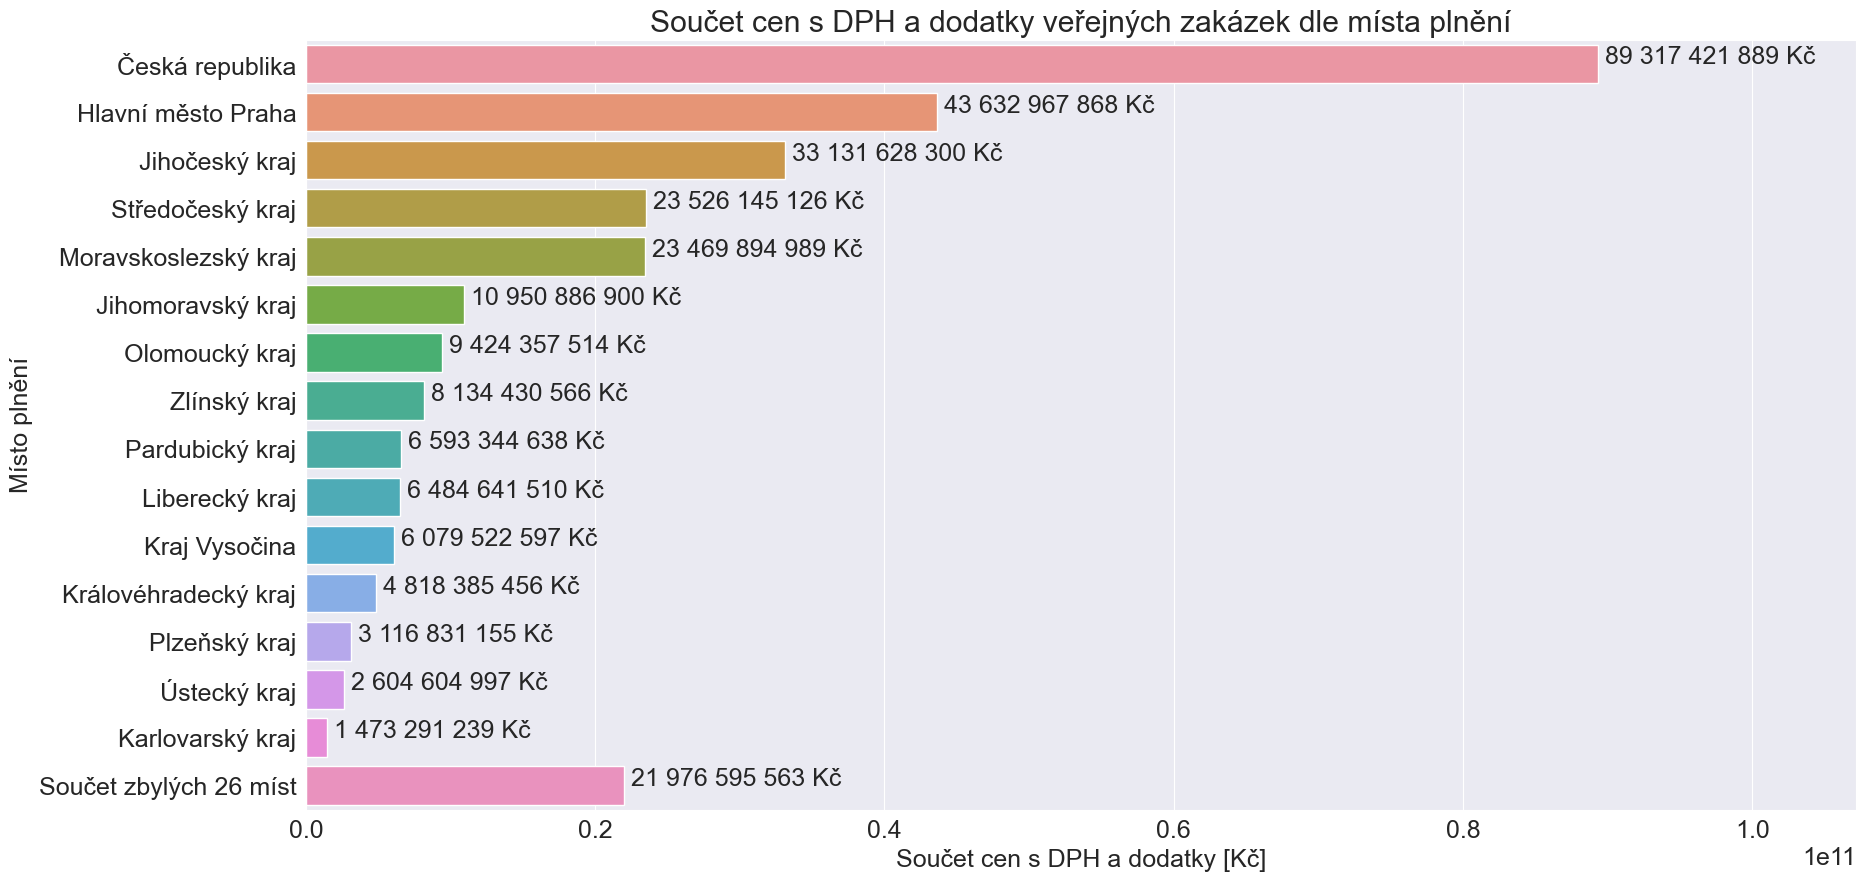

In [73]:
# Seskupení podle místa plnění a výpočet součtu cen s DPH a dodatky
n=15
procurement_view_grouped = procurement_view.groupby('place_of_performance')['contract_price_with_amendments_vat'].sum().reset_index()
m=procurement_view_grouped.shape[0]
# Seřazení podle 'contract_price_with_amendments' sestupně a výběr prvních n kategorií
procurement_view_sorted = procurement_view_grouped.sort_values(by='contract_price_with_amendments_vat', ascending=False).head(n)

# Součet cen s DPH a dodatky pro jednotlivá místa plnění
total_sum = procurement_view['contract_price_with_amendments_vat'].sum()

# Součet cen s DPH a dodatky pro prvních n míst plnění
top_n_sum = procurement_view_sorted['contract_price_with_amendments_vat'].sum()

# Součet cen s DPH a dodatky pro zbylá místa plnění
rest_sum = total_sum - top_n_sum

# Přidání nového řádku pro zbylá místa plnění
procurement_view_sorted.loc[len(procurement_view_sorted.index)] = ({'place_of_performance': "Součet zbylých {} míst".format(m-n), 'contract_price_with_amendments_vat': rest_sum})

plt.figure(figsize=(20, 10))
barplot = sns.barplot(y='place_of_performance', x='contract_price_with_amendments_vat', data=procurement_view_sorted, errorbar=None)
plt.title('Součet cen s DPH a dodatky veřejných zakázek dle místa plnění')
plt.ylabel('Místo plnění')
plt.xlabel('Součet cen s DPH a dodatky [Kč]')
plt.xlim(0, procurement_view_sorted['contract_price_with_amendments_vat'].max() * 1.2)
for p in barplot.patches:
    width = p.get_width()
    formatted_width = '{:,}'.format(int(width)).replace(',', ' ')  # Format the sum with spaces
    plt.text(width,
             p.get_y() + p.get_height() / 2,
             ' {} Kč'.format(formatted_width),
             ha = 'left')
plt.show()

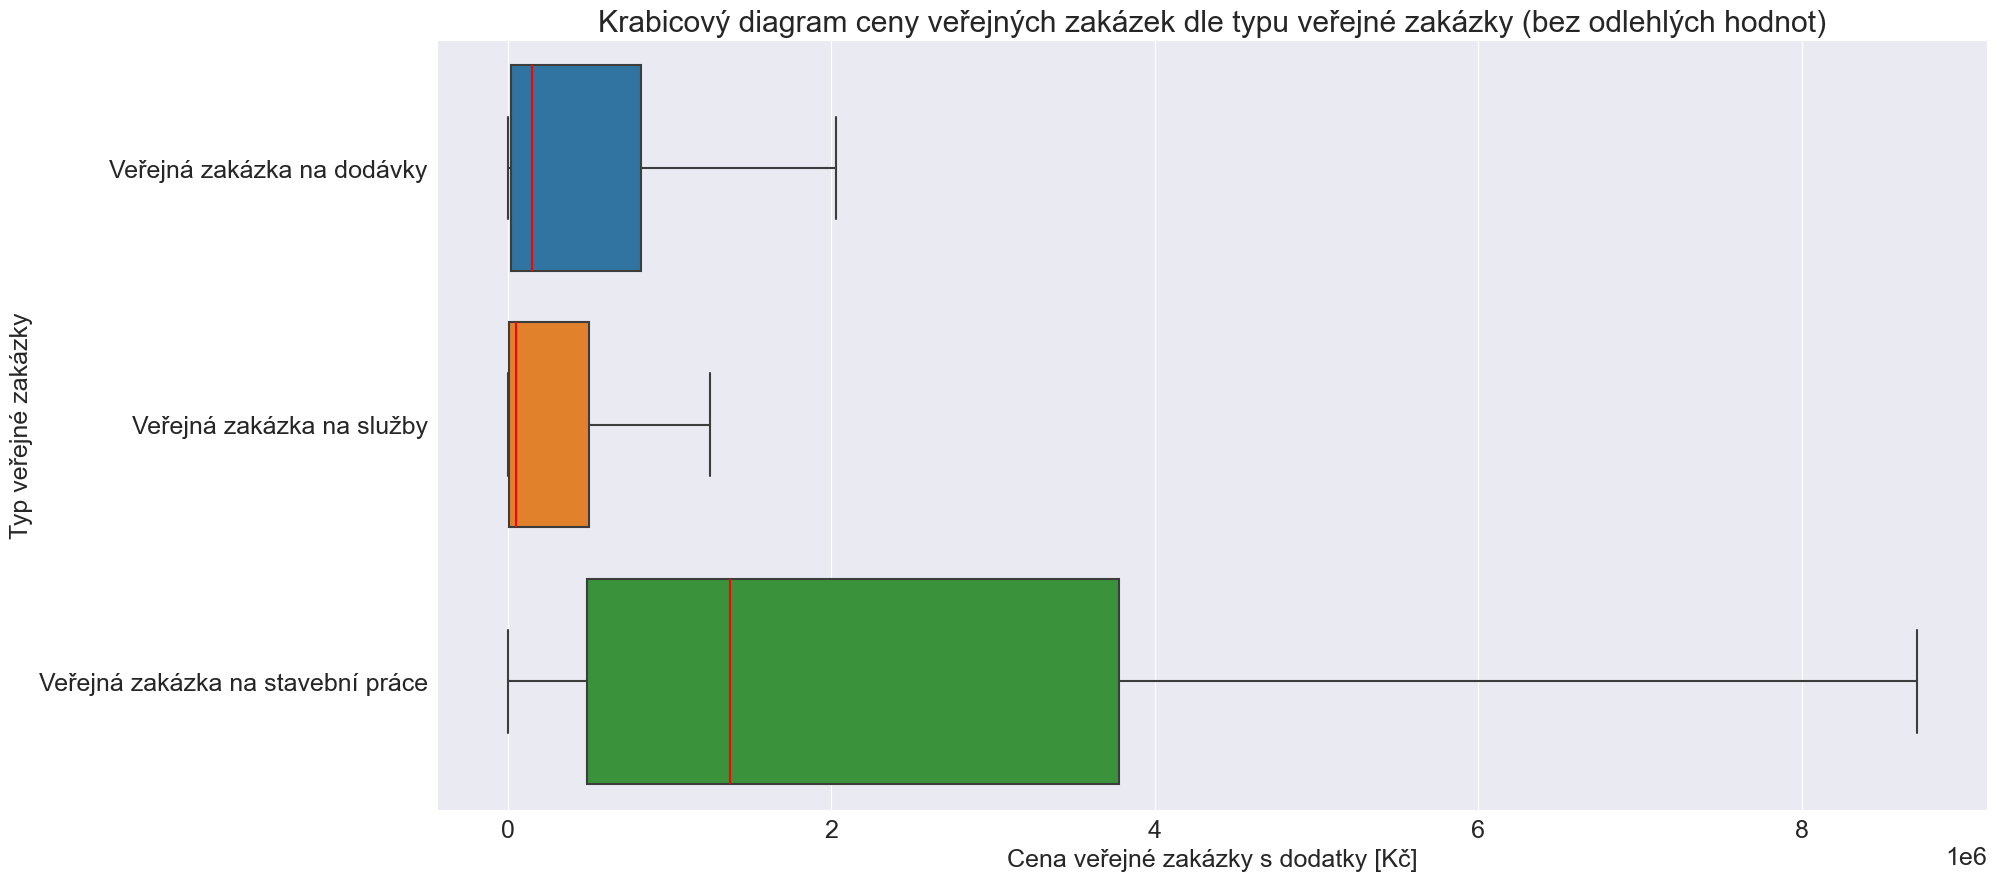

In [74]:
p = dataframes['procurement']
contract_price = p[p['contract_price_with_amendments'].between(p['contract_price_with_amendments'].quantile(.05), p['contract_price_with_amendments'].quantile(.95))] 
list_of_types = ['Veřejná zakázka na dodávky', 'Veřejná zakázka na služby', 'Veřejná zakázka na stavební práce']
contract_price = contract_price[contract_price['type'].isin(list_of_types)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=contract_price, x='contract_price_with_amendments', y='type', medianprops=dict(color='red'), showfliers=False)

plt.xlabel('Cena veřejné zakázky s dodatky [Kč]')
plt.ylabel('Typ veřejné zakázky')
plt.title('Krabicový diagram ceny veřejných zakázek dle typu veřejné zakázky (bez odlehlých hodnot)')
plt.show()

Přehled VZ dle ceny s DPH seřazených sestupně:

In [75]:
dataframes['procurement'].sort_values(by='contract_price_with_amendments_vat', ascending=False)

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,name_from_nipez_codelist,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,code
14352,14403,2023-08-16,45252300-1,1.239521e+10,1.499820e+10,1.239521e+10,1.499820e+10,2023-09-26,2020-12-21,True,...,Výstavba spaloven odpadů,Středočeský kraj,Nadlimitní veřejná zakázka,N006/20/V00030842,Veřejná zakázka na stavební práce,Jednací řízení s uveřejněním,2229,70,112,45
27335,27369,NaN,09123000-7,7.024773e+09,8.499983e+09,7.024773e+09,8.499983e+09,2022-04-29,2022-05-04,False,...,Zemní plyn,Česká republika,Nadlimitní veřejná zakázka,N006/22/V00009480,Veřejná zakázka na dodávky,Jednací řízení bez uveřejnění,419,175,3509,09
26033,26072,2023-02-14,60210000-3,5.684083e+09,5.684083e+09,5.684083e+09,5.684083e+09,2023-05-02,2022-10-31,False,...,Služby veřejné železniční dopravy,Česká republika,Nadlimitní veřejná zakázka,N006/22/V00028809,Veřejná zakázka na služby,Otevřené řízení,2895,379,10843,60
25796,25835,2023-02-13,44610000-9,3.798000e+09,4.595580e+09,3.798000e+09,4.595580e+09,2023-05-09,2022-03-11,False,...,"Nádrže, zásobníky, podobné nádoby a tlakové ná...",Jihočeský kraj,Nadlimitní veřejná zakázka,N006/22/V00005142,Veřejná zakázka na dodávky,Jednací řízení s uveřejněním,2888,70,463,44
30054,30120,2022-10-24,45000000-7,3.146685e+09,3.807489e+09,3.146685e+09,3.807489e+09,2023-02-23,2022-07-04,True,...,Stavební práce,Liberecký kraj,Nadlimitní veřejná zakázka,N006/22/V00017355,Veřejná zakázka na stavební práce,Otevřené řízení,3087,322,4849,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28889,28890,2020-11-24,72261000-2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2021-01-29,2020-10-23,False,...,Podpora programového vybavení,Hlavní město Praha,Nadlimitní veřejná zakázka,N006/20/V00025554,Veřejná zakázka na služby,Otevřené řízení,265,163,1056,72
15088,15136,NaN,55322000-3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2020-03-24,2020-03-24,False,...,Vaření jídel,Plzeňský kraj,NaN,N006/20/V00006352,Veřejná zakázka na služby,Zadávání VZ na základě rámcové dohody bez obno...,2161,1,5173,55
28891,28892,NaN,71317200-5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018-12-01,2018-12-07,False,...,Služby v oblasti bezpečnosti a zdraví (BOZP),NaN,Veřejná zakázka malého rozsahu,N006/18/V00022874,Veřejná zakázka na služby,Uzavřená výzva,3021,62,11546,71
28892,28893,2019-10-01,72261000-2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019-11-21,2019-09-02,False,...,Podpora programového vybavení,Praha,Nadlimitní veřejná zakázka,N006/19/V00021828,Veřejná zakázka na služby,Otevřené řízení,265,163,2150,72


Poměr ano / ne hodnot pro příznaky is_association_of_suppliers, is_withdrawn, is_rejected_due_too_low v tabulce offer:

In [76]:
val_is_asso = dataframes['offer']['is_association_of_suppliers'].value_counts()
val_is_with = dataframes['offer']['is_withdrawn'].value_counts()
val_is_rej = dataframes['offer']['is_rejected_due_too_low'].value_counts()

# display the values in percentage
display(val_is_asso / dataframes['offer'].shape[0] * 100)
display(val_is_with / dataframes['offer'].shape[0] * 100)
display(val_is_rej / dataframes['offer'].shape[0] * 100)


is_association_of_suppliers
False    98.420016
True      1.567139
Name: count, dtype: float64

is_withdrawn
False    98.908141
True      1.079013
Name: count, dtype: float64

is_rejected_due_too_low
False    99.791619
True      0.196963
Name: count, dtype: float64

Nabídky se špatnou cenou s DPH:

In [77]:
wrong_vat = dataframes['offer'][dataframes['offer']['price_vat'] / dataframes['offer']['price'] > 1.211]
wrong_vat.sort_values(by='price_vat', ascending=False)

,id,is_association_of_suppliers,is_rejected_due_too_low,is_withdrawn,price,price_vat,company_id,procurement_id


Odstranění řádků s chybnými cenami s DPH:

In [78]:
dataframes['offer'].drop(wrong_vat.index, inplace=True)

Procento odlehlých hodnot v ceně nabídek s DPH, určených pomocí metody IQR:

In [79]:
Q1 = dataframes['offer']['price_vat'].quantile(0.25)
Q3 = dataframes['offer']['price_vat'].quantile(0.75)
IQR = Q3 - Q1
outliers = dataframes['offer'][(dataframes['offer']['price_vat'] < (Q1 - 1.5 * IQR)) | (dataframes['offer']['price_vat'] > (Q3 + 1.5 * IQR))]
display(outliers.sort_values(by='price_vat', ascending=False))
print(f"Procento odlehlých hodnot: {outliers.shape[0] / dataframes['offer'].shape[0] * 100:.2f} %")

,id,is_association_of_suppliers,is_rejected_due_too_low,is_withdrawn,price,price_vat,company_id,procurement_id
7411,7437,False,False,False,1.145797e+11,1.386414e+11,3167,3765
7407,7433,False,False,False,1.130746e+11,1.368203e+11,2106,3765
7412,7438,False,False,False,1.108713e+11,1.341542e+11,1152,3765
2934,2958,False,False,False,9.370252e+10,1.133800e+11,341,1562
9000,9050,False,False,False,3.348099e+10,4.051200e+10,1934,4602
...,...,...,...,...,...,...,...,...
10546,10597,False,False,False,2.821506e+06,3.414022e+06,204,5248
35473,35525,False,False,False,2.820000e+06,3.412200e+06,8518,17389
8713,8764,False,False,False,2.819800e+06,3.411958e+06,263,4482
22541,22536,False,False,False,2.819760e+06,3.411910e+06,124,10918


Procento odlehlých hodnot: 11.98 %


Příprava dat pro vizualizaci bez odlehlých hodnot:

In [80]:
data_witout_outliers = dataframes['offer'][~dataframes['offer'].index.isin(outliers.index)]

C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


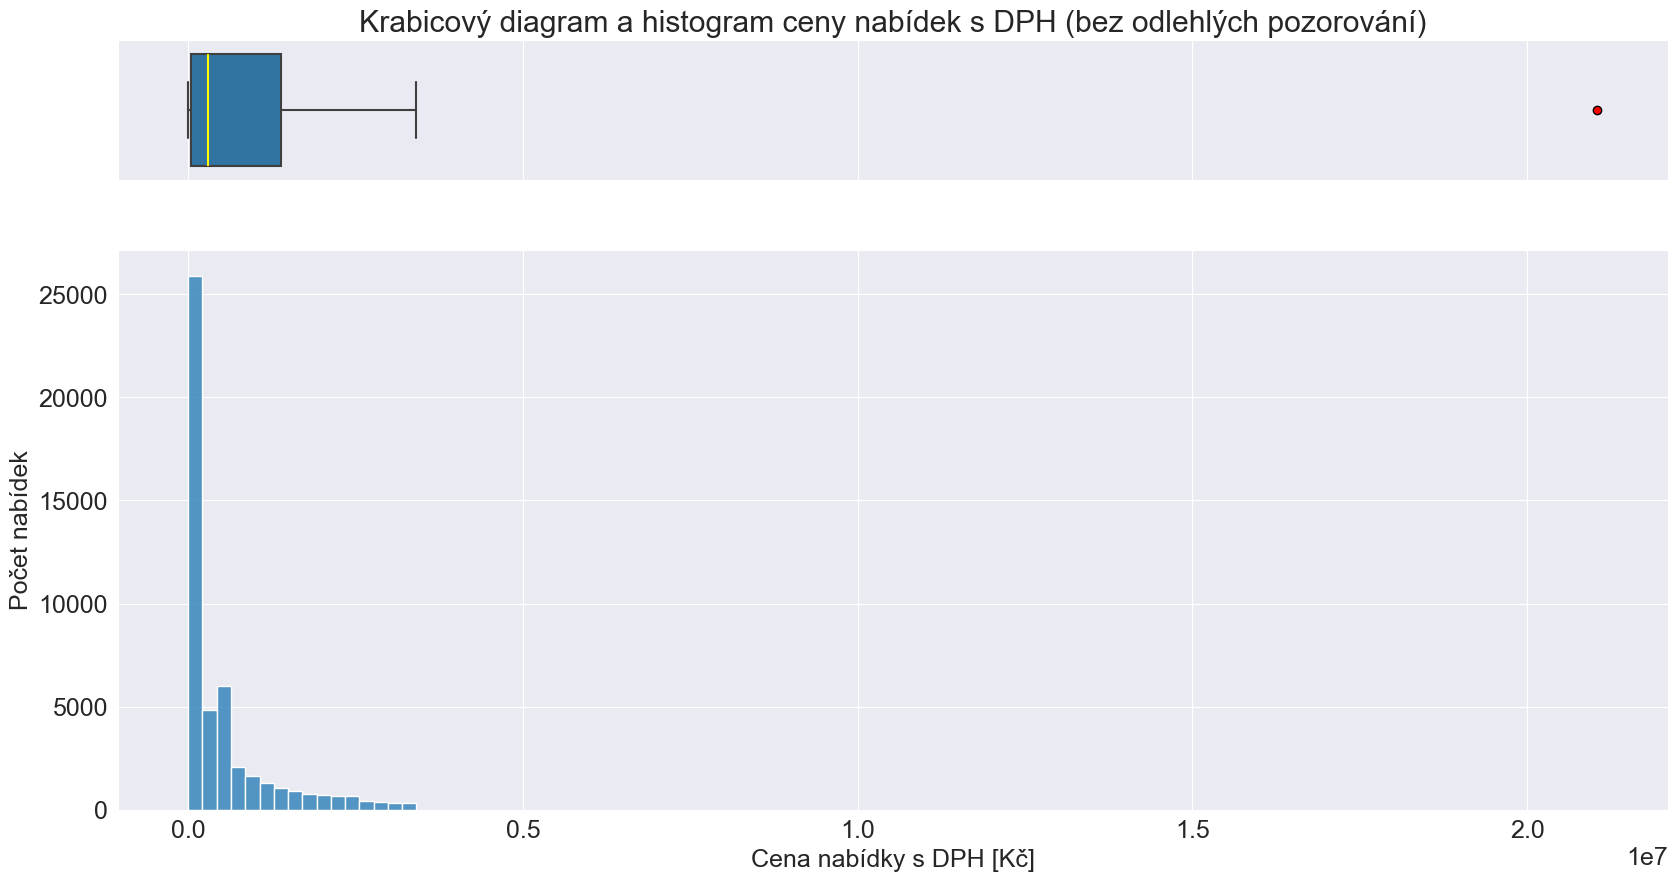

In [81]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(20, 10))
 

sns.boxplot(ax=ax_box,data=dataframes['offer'], x='price_vat', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'))
ax_box.set(xlabel='')
ax_hist.set_xlabel('Cena nabídky s DPH [Kč]')
ax_hist.set_ylabel('Počet nabídek')
ax_box.set_title('Krabicový diagram a histogram ceny nabídek s DPH (bez odlehlých pozorování)')


sns.histplot(ax=ax_hist, data=data_witout_outliers, x='price_vat', bins=int(1 + np.log2(data_witout_outliers.shape[0])))
plt.show()

Počet nabídek s cenou 0 a procento jejich zastoupení v datech:

In [82]:
count = dataframes['offer'][dataframes['offer']['price_vat'] == 0].shape[0]
per = dataframes['offer'][dataframes['offer']['price_vat'] == 0].shape[0] / dataframes['offer'].shape[0] * 100
print(f"Počet nabídek s cenou 0 je {count} a procento jejich zastoupení v datech je {per:.2f} %")

Počet nabídek s cenou 0 je 2898 a procento jejich zastoupení v datech je 4.14 %


In [83]:
mean = dataframes['offer']['price_vat'].mean(skipna=True)
median = dataframes['offer']['price_vat'].median(skipna=True)
print(f"Průměrná cena nabídky s DPH je {mean:,.2f} Kč a medián je {median:,.2f} Kč")

Průměrná cena nabídky s DPH je 21,048,209.92 Kč a medián je 301,290.00 Kč
